#Org. de Datos 75.06/95.58
##Grupo *6* | EJ1
## Integrantes:
### Gino Valentino Oggero - goggero@fi.uba.ar
### Isabella Schneider - ischneider.ext@fi.uba.ar
### Rita Castro Lobo - ritacastrolobo@tecnico.ulisboa.pt


#Preparación del Notebook
Importación de bibliotecas y creación del drive.

In [3]:
# Importação de bibliotecas
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.stats import gaussian_kde
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import geopandas as gpd
import pyarrow.parquet as pq
from scipy.stats import zscore
import warnings
from google.colab import drive

# Suprimir avisos de futuras depreciações
warnings.filterwarnings("ignore", category=FutureWarning)

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Carregamiento de los *datos*
Carga del conjunto de datos combinado de los meses de abril, mayo y junio de Yellow Taxis en New York.

In [4]:
# Carregando o dataset
months = ['2023-04', '2023-05', '2023-06']
comb = [pq.read_table(f'/content/drive/MyDrive/yellow_tripdata_{month}.parquet').to_pandas() for month in months]
taxis = pd.concat(comb, ignore_index=True)
taxis

VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0                1  2023-04-01 00:14:49   2023-04-01 00:45:01   
1                2  2023-04-01 00:00:24   2023-04-01 00:56:19   
2                1  2023-04-01 00:03:50   2023-04-01 00:14:42   
3                1  2023-04-01 00:53:18   2023-04-01 01:01:28   
4                2  2023-04-01 00:07:00   2023-04-01 00:17:16   
...            ...                  ...                   ...   
10109128         2  2023-06-30 23:30:21   2023-07-01 00:00:46   
10109129         1  2023-06-30 23:34:22   2023-07-01 00:32:59   
10109130         2  2023-06-30 23:45:00   2023-07-01 00:10:00   
10109131         2  2023-06-30 23:13:38   2023-06-30 23:51:19   
10109132         2  2023-06-30 23:18:00   2023-06-30 23:31:00   

          passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                     2.0           4.90         1.0                  N   
1                     1.0          21.89         2.0                  N   
2                     2.0           1.30         1.0                  N   
3                     1.0           1.50         1.0                  N   
4                     2.0           1.49         1.0                  N   
...                   ...            ...         ...                ...   
10109128              NaN           9.20         NaN               None   
10109129              NaN          20.20         NaN               None   
10109130              NaN           6.16         NaN               None   
10109131              NaN          11.65         NaN               None   
10109132              NaN           1.40         NaN               None   

          PULocationID  DOLocationID  payment_type  fare_amount  extra  \
0                   48           223             1        28.90   3.50   
1                  132            43             2        70.00   0.00   
2                  148           113             1        11.40   3.50   
3                  249            79             1        10.00   3.50   
4                  158           246             1        11.40   1.00   
...                ...           ...           ...          ...    ...   
10109128            42           148             0        38.53   0.00   
10109129           132            74             0        70.00   1.75   
10109130           256           140             0        28.03   0.00   
10109131            91           246             0        45.74   0.00   
10109132           164           230             0        14.35   0.00   

          mta_tax  tip_amount  tolls_amount  improvement_surcharge  \
0             0.5        6.00          0.00                    1.0   
1             0.5        0.00          6.55                    1.0   
2             0.5        2.00          0.00                    1.0   
3             0.5        1.00          0.00                    1.0   
4             0.5        1.00          0.00                    1.0   
...           ...         ...           ...                    ...   
10109128      0.5        8.51          0.00                    1.0   
10109129      0.5       11.97          6.55                    1.0   
10109130      0.5        6.41          0.00                    1.0   
10109131      0.5        0.00          6.55                    1.0   
10109132      0.5        0.00          0.00                    1.0   

          total_amount  congestion_surcharge  Airport_fee  
0                39.90                   2.5         0.00  
1                81.80                   2.5         1.25  
2                18.40                   2.5         0.00  
3                16.00                   2.5         0.00  
4                17.40                   2.5         0.00  
...                ...                   ...          ...  
10109128         51.04                   NaN          NaN  
10109129         91.77                   NaN          NaN  
10109130         38.44                   NaN          NaN 

In [14]:
taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10109133 entries, 0 to 10109132
Data columns (total 24 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     category      
 7   PULocationID           category      
 8   DOLocationID           category      
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee         

# Exploración Inicial
Análisis de cada variable y cálculo de medidas de resumen, con visualización de los resultados mediante gráficos de distribución y correlación.

In [3]:
# Dataset
print("Informações do dataset:")
print(taxis.info())

print("\nEstatísticas descritivas:")
print(taxis.describe())

print("\nTipos de dados no dataset:")
print(taxis.dtypes)

Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10109133 entries, 0 to 10109132
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 

In [6]:
# Converter 'tpep_pickup_datetime' e 'tpep_dropoff_datetime' para datetime
taxis['tpep_pickup_datetime'] = pd.to_datetime(taxis['tpep_pickup_datetime'])
taxis['tpep_dropoff_datetime'] = pd.to_datetime(taxis['tpep_dropoff_datetime'])

# Criar a coluna 'trip_duration' em minutos
taxis['trip_duration'] = (taxis['tpep_dropoff_datetime'] - taxis['tpep_pickup_datetime']).dt.total_seconds() / 60

# Criar novas colunas para o dia da semana e o mês
taxis['day_of_week'] = taxis['tpep_pickup_datetime'].dt.day_name()
taxis['month'] = taxis['tpep_pickup_datetime'].dt.month

# Converter colunas qualitativas para tipo 'category'
categ_columns = ['PULocationID', 'DOLocationID', 'store_and_fwd_flag', 'day_of_week']  # Colunas que podem ser categóricas
for col in categ_columns:
    taxis[col] = taxis[col].astype('category')

In [4]:
# Criar listas para armazenar as estatísticas
variaveis = []
medias = []
medianas = []
modas = []
desvios = []
alcances = []
valores_unicos = []
valores_nulos = []
valores_duplicados = []

# Analisar variáveis quantitativas (numéricas) do dataset
for column in taxis.select_dtypes(include=np.number).columns:
    variaveis.append(column)
    medias.append(taxis[column].mean())
    medianas.append(taxis[column].median())
    modas.append(taxis[column].mode()[0])
    desvios.append(taxis[column].std())
    alcances.append(taxis[column].max() - taxis[column].min())
    valores_unicos.append(taxis[column].nunique())
    valores_nulos.append(taxis[column].isnull().sum())
    valores_duplicados.append(taxis[column].duplicated().sum())

    # Assign the calculated values to variables for printing
    mean_value = taxis[column].mean()
    median_value = taxis[column].median()
    mode_value = taxis[column].mode()[0]
    std_dev = taxis[column].std()
    data_range = taxis[column].max() - taxis[column].min()


    # Exibir os resultados
    print(f"\nAnálise da variável: {column}")
    print(f"  - Média: {mean_value}")
    print(f"  - Mediana: {median_value}")
    print(f"  - Moda: {mode_value}")
    print(f"  - Desvio Padrão: {std_dev}")
    print(f"  - Alcance: {data_range}")
    print(f"  - Valores únicos: {taxis[column].nunique()}")
    print(f"  - Valores nulos: {taxis[column].isnull().sum()}")
    print(f"  - Valores duplicados: {taxis[column].duplicated().sum()}")


Análise da variável: VendorID
  - Média: 1.7348666794669731
  - Mediana: 2.0
  - Moda: 2
  - Desvio Padrão: 0.4457905260541891
  - Alcance: 5
  - Valores únicos: 3
  - Valores nulos: 0
  - Valores duplicados: 10109130

Análise da variável: passenger_count
  - Média: 1.3699603535178613
  - Mediana: 1.0
  - Moda: 1.0
  - Desvio Padrão: 0.893809256286184
  - Alcance: 9.0
  - Valores únicos: 10
  - Valores nulos: 292373
  - Valores duplicados: 10109122

Análise da variável: trip_distance
  - Média: 4.2721305239529475
  - Mediana: 1.82
  - Moda: 1.0
  - Desvio Padrão: 261.0343429067649
  - Alcance: 342344.85
  - Valores únicos: 6033
  - Valores nulos: 0
  - Valores duplicados: 10103100

Análise da variável: RatecodeID
  - Média: 1.5779012627384188
  - Mediana: 1.0
  - Moda: 1.0
  - Desvio Padrão: 6.99784962220408
  - Alcance: 98.0
  - Valores únicos: 7
  - Valores nulos: 292373
  - Valores duplicados: 10109125

Análise da variável: payment_type
  - Média: 1.1893940855264244
  - Mediana: 1.

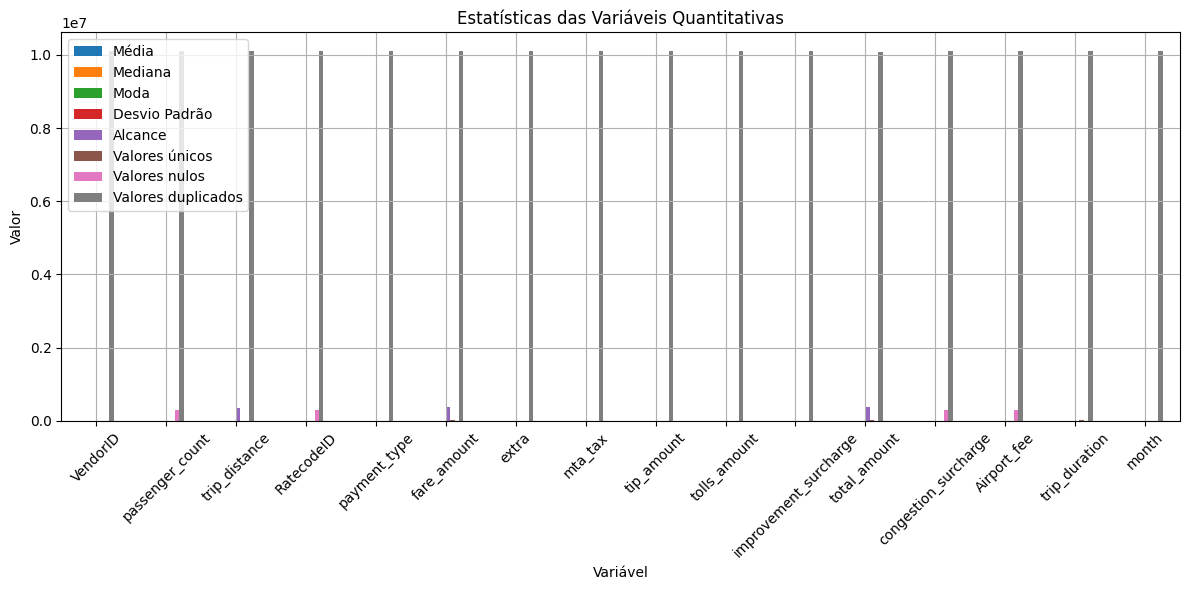

In [6]:
# Criar DataFrame com as estatísticas
taxis_estatisticas = pd.DataFrame({
    'Variável': variaveis,
    'Média': medias,
    'Mediana': medianas,
    'Moda': modas,
    'Desvio Padrão': desvios,
    'Alcance': alcances,
    'Valores únicos': valores_unicos,
    'Valores nulos': valores_nulos,
    'Valores duplicados': valores_duplicados
})

# Plotar gráfico de barras agrupadas
taxis_estatisticas.set_index('Variável')[['Média', 'Mediana', 'Moda', 'Desvio Padrão', 'Alcance', 'Valores únicos', 'Valores nulos', 'Valores duplicados']].plot(kind='bar', figsize=(12, 6))

# Adicionar título e rótulos aos eixos
plt.title('Estatísticas das Variáveis Quantitativas')
plt.xlabel('Variável')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Mostrar o gráfico
plt.show()

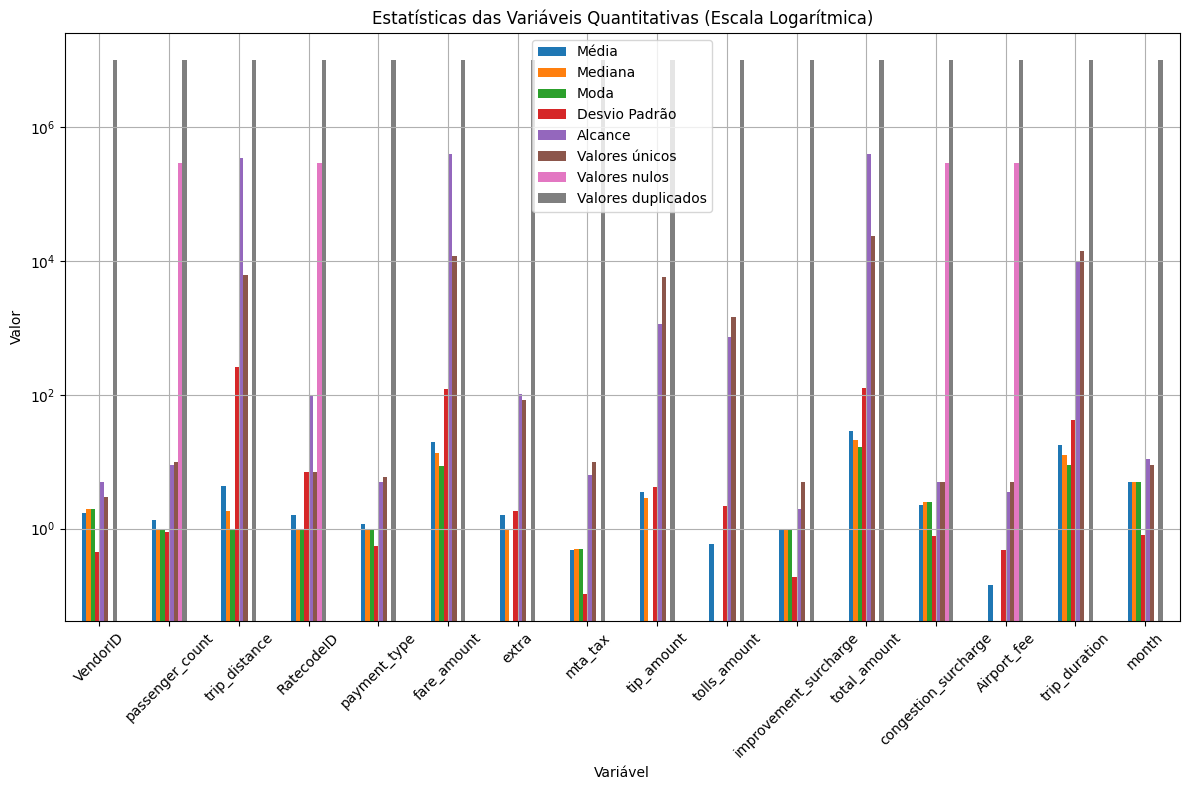

In [7]:
# Gráfico com escala logarítmica
taxis_estatisticas.set_index('Variável')[['Média', 'Mediana', 'Moda', 'Desvio Padrão', 'Alcance', 'Valores únicos', 'Valores nulos', 'Valores duplicados']].plot(kind='bar', figsize=(12, 8))

plt.yscale('log')  # Define o eixo y como logarítmico
plt.title('Estatísticas das Variáveis Quantitativas (Escala Logarítmica)')
plt.xlabel('Variável')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
# Analisar variáveis qualitativas (categóricas) do dataset
print("\nAnálise das Variáveis Qualitativas (Categóricas):")
for column in taxis.select_dtypes(include='category').columns:
    unique_values = taxis[column].nunique()
    most_frequent = taxis[column].value_counts().idxmax()
    freq_most_frequent = taxis[column].value_counts().max()

    # Exibir os resultados
    print(f"\nAnálise da variável categórica: {column}")
    print(f"  - Valores únicos: {unique_values}")
    print(f"  - Valor mais frequente: {most_frequent} (Frequência: {freq_most_frequent})")


Análise das Variáveis Qualitativas (Categóricas):

Análise da variável categórica: store_and_fwd_flag
  - Valores únicos: 2
  - Valor mais frequente: N (Frequência: 9759840)

Análise da variável categórica: PULocationID
  - Valores únicos: 262
  - Valor mais frequente: 132 (Frequência: 531555)

Análise da variável categórica: DOLocationID
  - Valores únicos: 261
  - Valor mais frequente: 236 (Frequência: 449704)

Análise da variável categórica: day_of_week
  - Valores únicos: 7
  - Valor mais frequente: Thursday (Frequência: 1587083)


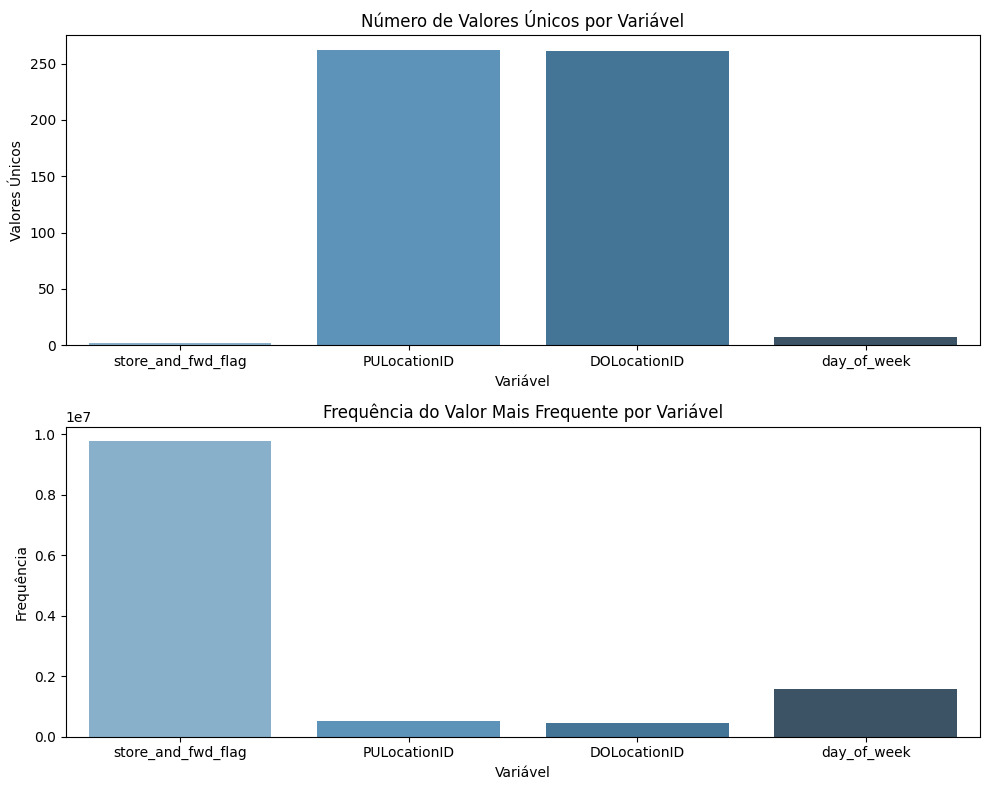

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar um DataFrame com as informações calculadas
qualitativas_estatisticas = {
    'Variável': ['store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'day_of_week'],
    'Valores Únicos': [2, 262, 261, 7],
    'Valor Mais Frequente': ['N', 132, 236, 'Thursday'],
    'Frequência do Valor Mais Frequente': [9759840, 531555, 449704, 1587083]
}

# Plotar gráfico de barras com as estatísticas
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Plotar valores únicos
sns.barplot(x='Variável', y='Valores Únicos', data=qualitativas_estatisticas, ax=ax[0], palette='Blues_d')
ax[0].set_title('Número de Valores Únicos por Variável')
ax[0].set_ylabel('Valores Únicos')

# Plotar frequências do valor mais frequente
sns.barplot(x='Variável', y='Frequência do Valor Mais Frequente', data=qualitativas_estatisticas, ax=ax[1], palette='Blues_d')
ax[1].set_title('Frequência do Valor Mais Frequente por Variável')
ax[1].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

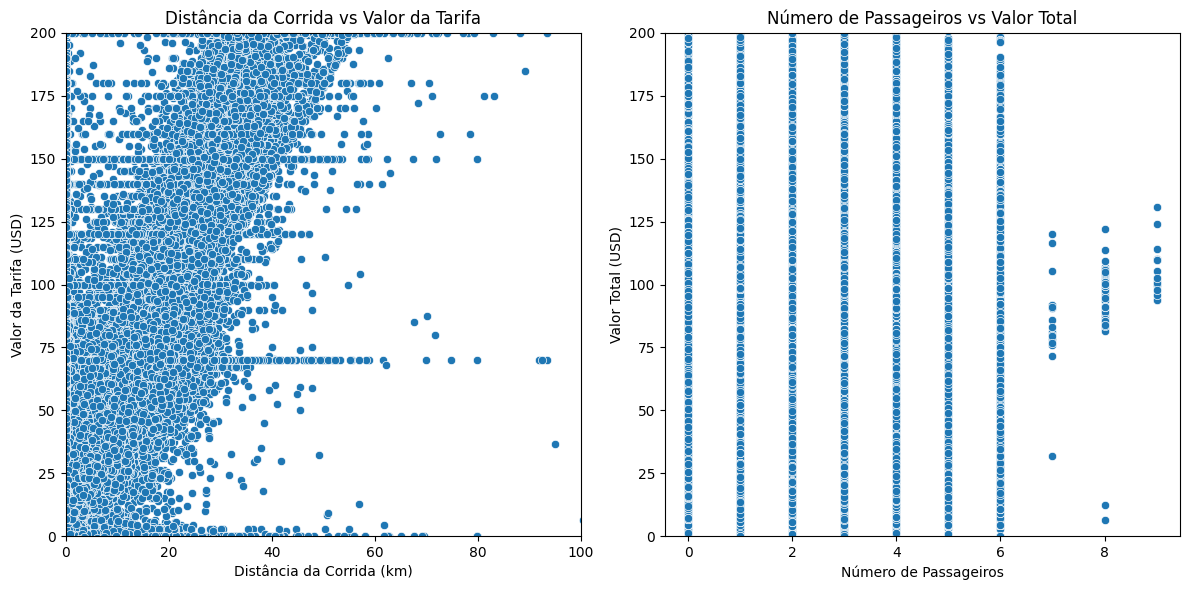

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustar os limites dos gráficos de dispersão
plt.figure(figsize=(12, 6))

# Distância da Corrida vs Valor da Tarifa
plt.subplot(1, 2, 1)
sns.scatterplot(x='trip_distance', y='fare_amount', data=taxis)
plt.xlim(0, 100)  # Limitar a distância a 100 km
plt.ylim(0, 200)  # Limitar o valor da tarifa a 200 USD
plt.title("Distância da Corrida vs Valor da Tarifa")
plt.xlabel("Distância da Corrida (km)")
plt.ylabel("Valor da Tarifa (USD)")

# Número de Passageiros vs Valor Total
plt.subplot(1, 2, 2)
sns.scatterplot(x='passenger_count', y='total_amount', data=taxis)
plt.ylim(0, 200)  # Limitar o valor total a 200 USD
plt.title("Número de Passageiros vs Valor Total")
plt.xlabel("Número de Passageiros")
plt.ylabel("Valor Total (USD)")

plt.tight_layout()
plt.show()

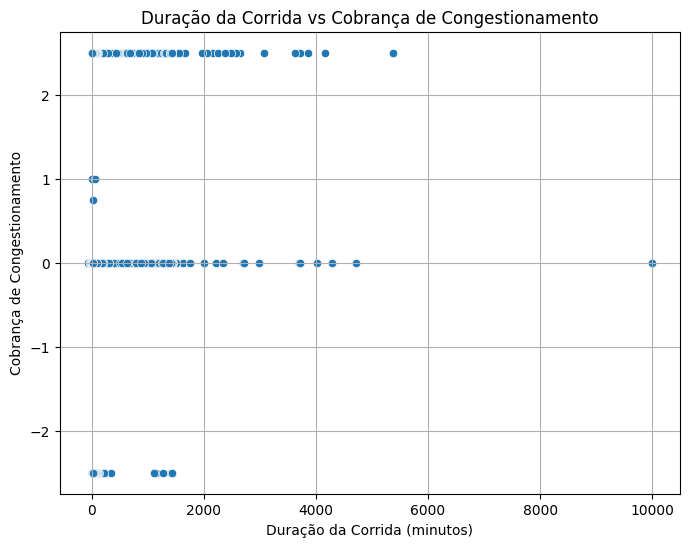

In [11]:
# Duração da Corrida vs Cobrança de Congestionamento
plt.figure(figsize=(8, 6))
sns.scatterplot(x='trip_duration', y='congestion_surcharge', data=taxis)
plt.title("Duração da Corrida vs Cobrança de Congestionamento")
plt.xlabel("Duração da Corrida (minutos)")
plt.ylabel("Cobrança de Congestionamento")
plt.grid(True)
plt.show()

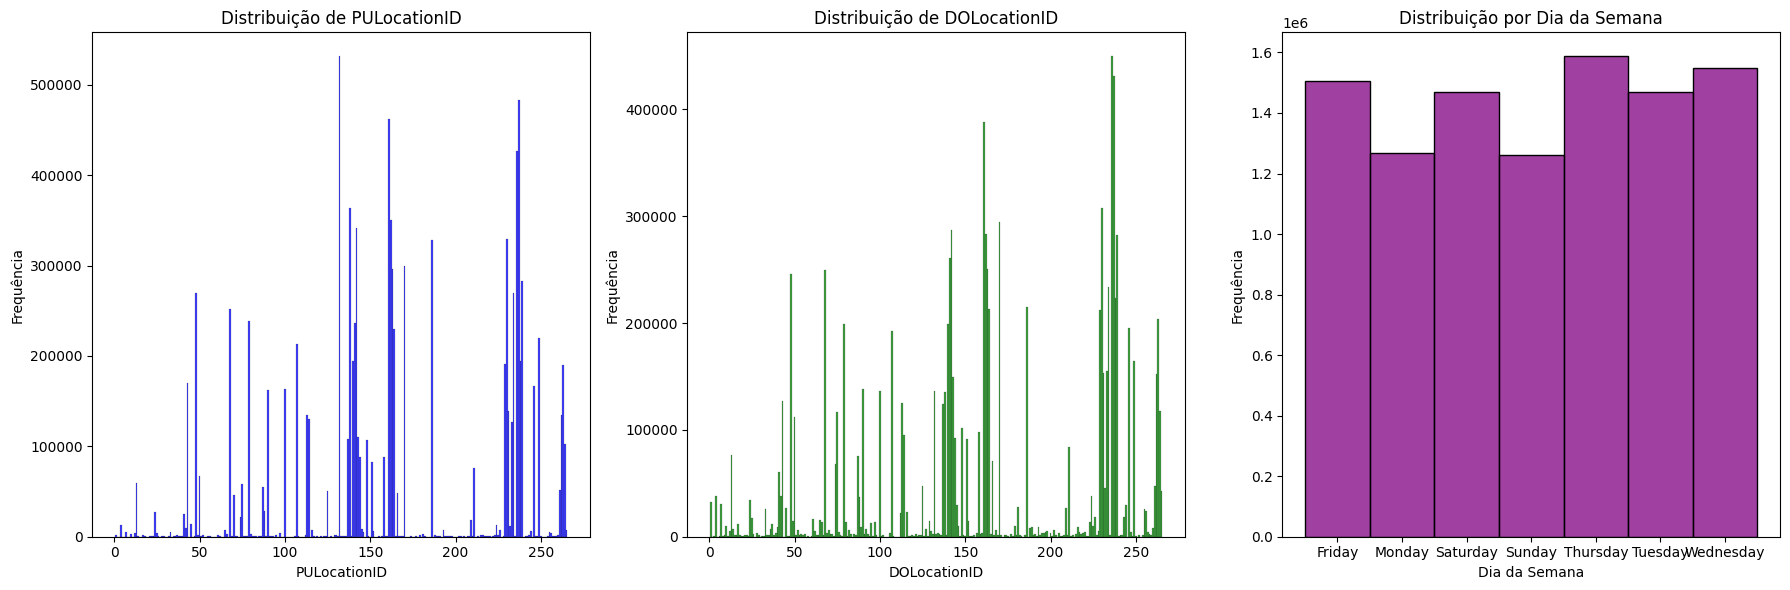

In [12]:
# Gerar subplots para PULocationID, DOLocationID e day_of_week (distribuições)
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico de distribuição para PULocationID
sns.histplot(taxis['PULocationID'], bins=30, ax=axs[0], kde=False, color='blue')
axs[0].set_title('Distribuição de PULocationID')
axs[0].set_xlabel('PULocationID')
axs[0].set_ylabel('Frequência')

# Gráfico de distribuição para DOLocationID
sns.histplot(taxis['DOLocationID'], bins=30, ax=axs[1], kde=False, color='green')
axs[1].set_title('Distribuição de DOLocationID')
axs[1].set_xlabel('DOLocationID')
axs[1].set_ylabel('Frequência')

# Gráfico de distribuição para day_of_week
sns.histplot(taxis['day_of_week'], bins=7, ax=axs[2], kde=False, color='purple')
axs[2].set_title('Distribuição por Dia da Semana')
axs[2].set_xlabel('Dia da Semana')
axs[2].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

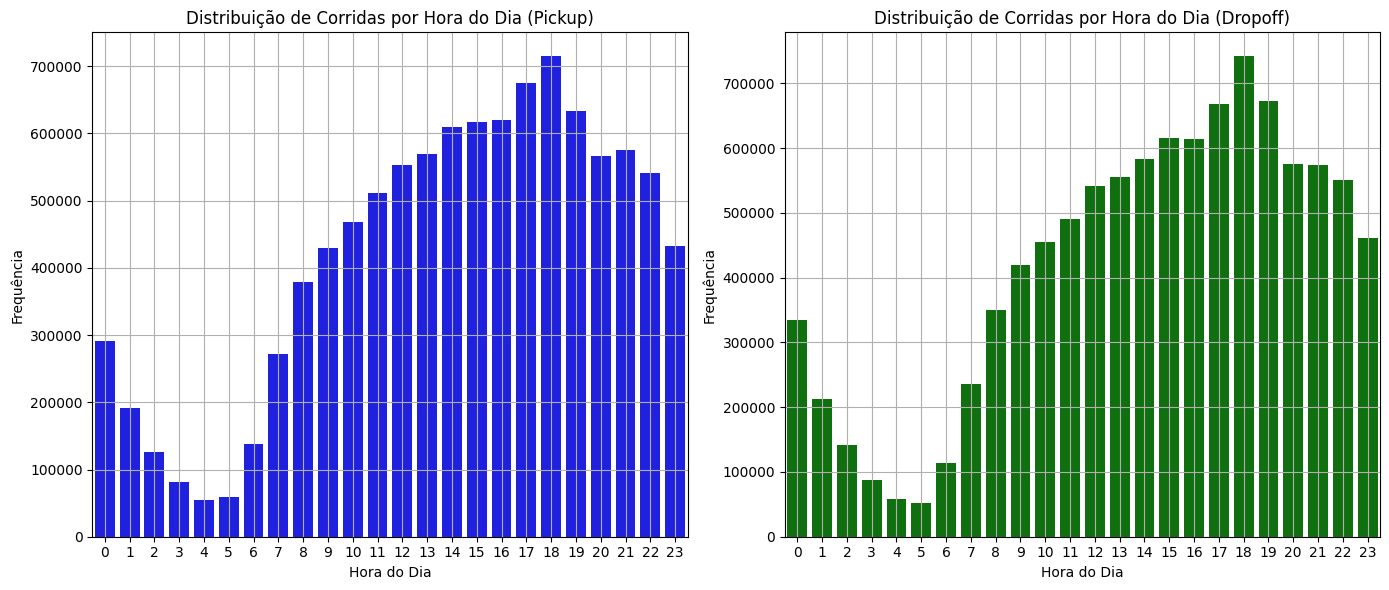

In [13]:
# Assuming 'tpep_pickup_datetime' is your pickup datetime column
# Create 'pickup_hour' column if it doesn't exist
if 'pickup_hour' not in taxis.columns:
  taxis['pickup_hour'] = pd.to_datetime(taxis['tpep_pickup_datetime']).dt.hour

# Gráficos lado a lado de Pickup e Dropoff
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(x='pickup_hour', data=taxis, color='blue', ax=axes[0])
axes[0].set_title("Distribuição de Corridas por Hora do Dia (Pickup)")
axes[0].set_xlabel("Hora do Dia")
axes[0].set_ylabel("Frequência")
axes[0].grid(True)

# Assuming 'tpep_dropoff_datetime' is your dropoff datetime column
# Create 'dropoff_hour' column if it doesn't exist
if 'dropoff_hour' not in taxis.columns:
    taxis['dropoff_hour'] = pd.to_datetime(taxis['tpep_dropoff_datetime']).dt.hour

sns.countplot(x='dropoff_hour', data=taxis, color='green', ax=axes[1])
axes[1].set_title("Distribuição de Corridas por Hora do Dia (Dropoff)")
axes[1].set_xlabel("Hora do Dia")
axes[1].set_ylabel("Frequência")
axes[1].grid(True)

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribuição de Corridas por Hora do Dia e Dia da Semana')

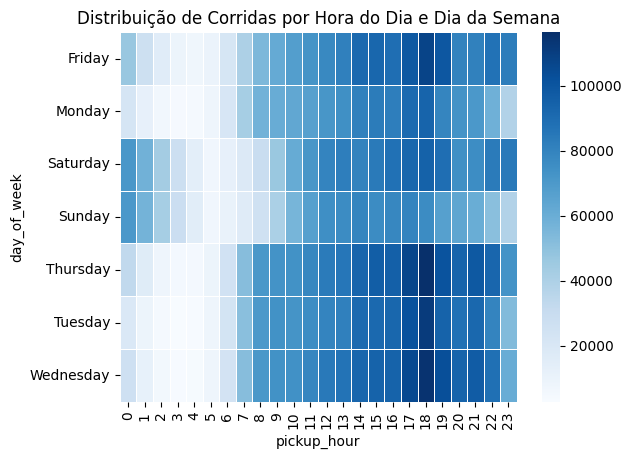

In [14]:
corridas_por_hora_e_dia = taxis.pivot_table(index='day_of_week', columns='pickup_hour', aggfunc='size', fill_value=0)
sns.heatmap(corridas_por_hora_e_dia, cmap='Blues', linewidths=0.5)
plt.title("Distribuição de Corridas por Hora do Dia e Dia da Semana")

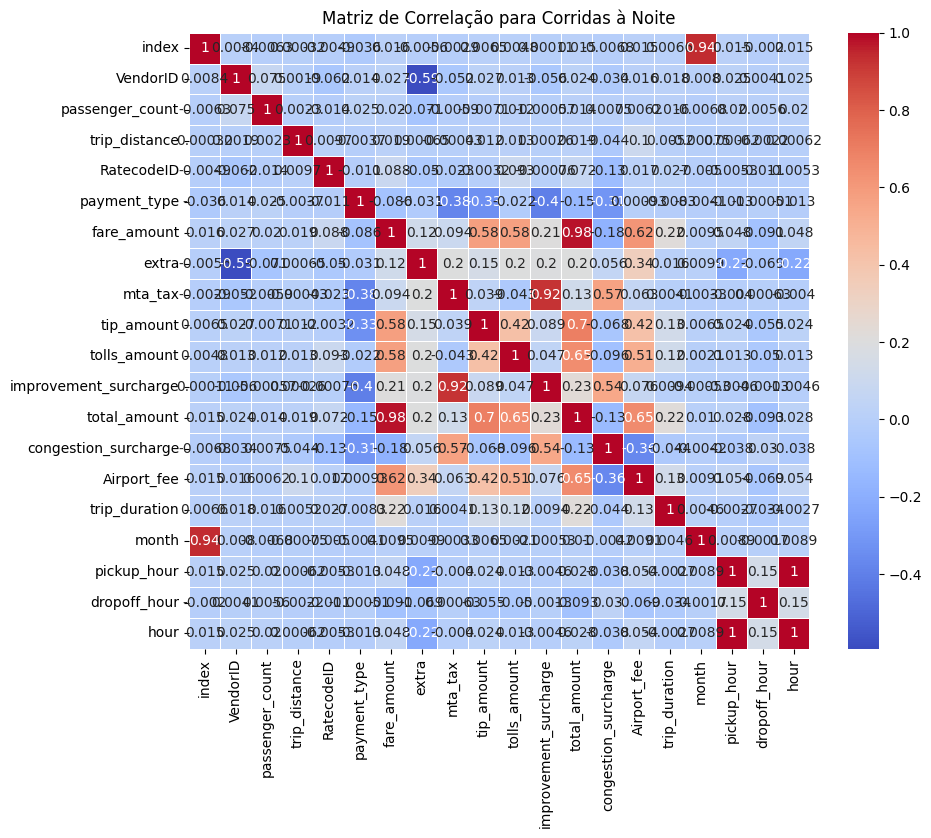

In [15]:
# Filtrar apenas corridas à noite
# Reset the index to make 'tpep_pickup_datetime' a column again
taxis = taxis.reset_index()

taxis['hour'] = taxis['tpep_pickup_datetime'].dt.hour
taxis_noite = taxis[(taxis['hour'] >= 18) & (taxis['hour'] <= 23)]

# Select only numerical features for correlation calculation
numerical_features = taxis_noite.select_dtypes(include=np.number).columns

# Calcular a matriz de correlação para corridas à noite
corr_noite = taxis_noite[numerical_features].corr()

# Exibir a matriz de correlação para corridas à noite
plt.figure(figsize=(10, 8))
sns.heatmap(corr_noite, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matriz de Correlação para Corridas à Noite")
plt.show()

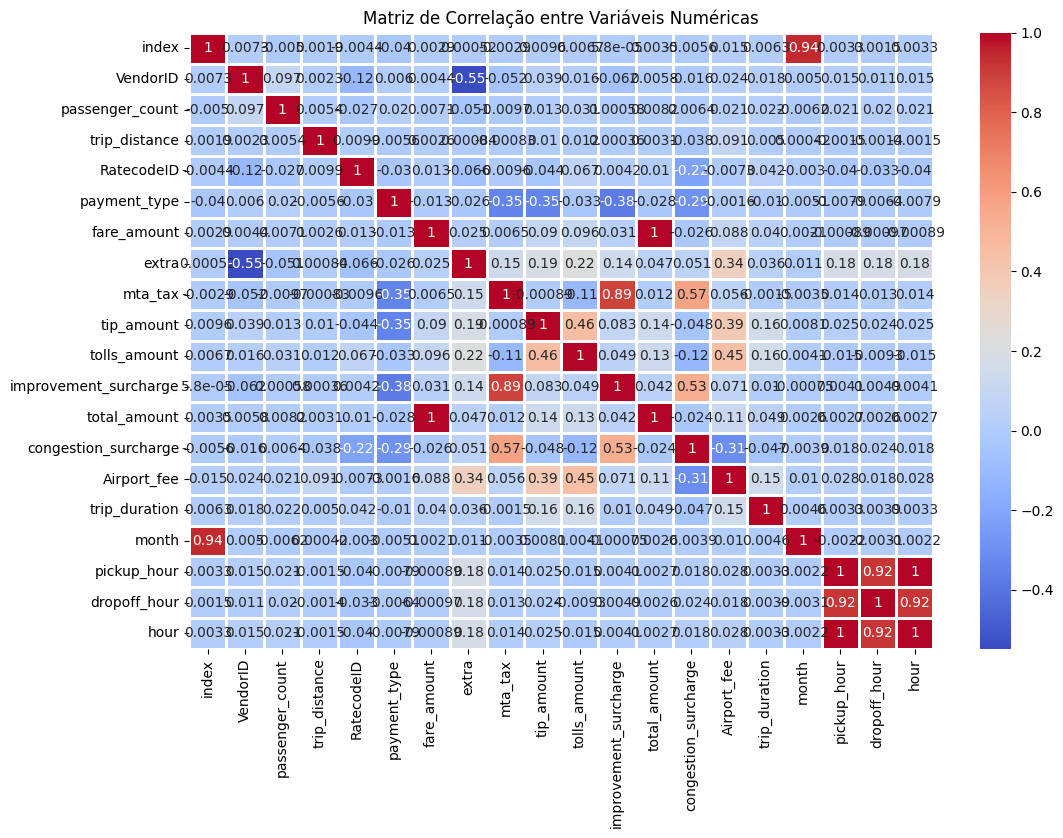

In [16]:
# Calcular a matriz de correlação apenas para colunas numéricas
correlation_matrix = taxis.select_dtypes(include=np.number).corr()

# Exibir a matriz de correlação com um mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.8)
plt.title("Matriz de Correlação entre Variáveis Numéricas")
plt.show()

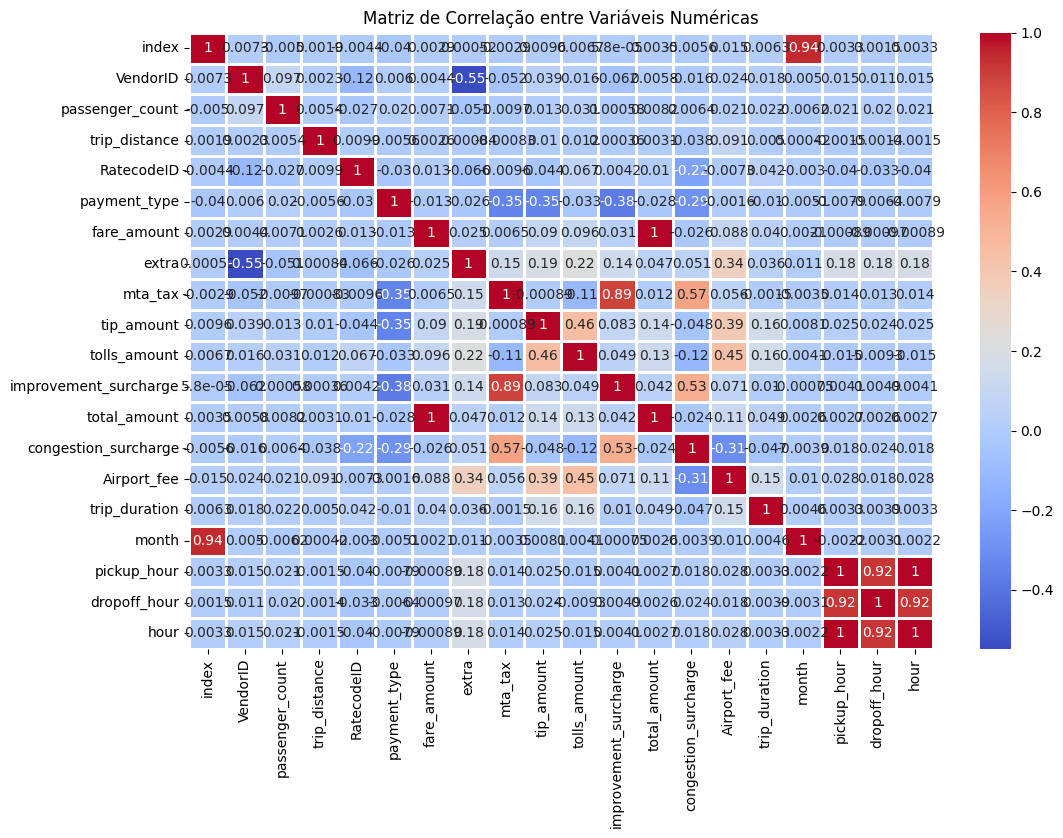


Correlações fortes (maiores que 0.7 ou menores que -0.7):
                         index  VendorID  passenger_count  trip_distance  \
index                  1.00000       NaN              NaN            NaN   
VendorID                   NaN       1.0              NaN            NaN   
passenger_count            NaN       NaN              1.0            NaN   
trip_distance              NaN       NaN              NaN            1.0   
RatecodeID                 NaN       NaN              NaN            NaN   
payment_type               NaN       NaN              NaN            NaN   
fare_amount                NaN       NaN              NaN            NaN   
extra                      NaN       NaN              NaN            NaN   
mta_tax                    NaN       NaN              NaN            NaN   
tip_amount                 NaN       NaN              NaN            NaN   
tolls_amount               NaN       NaN              NaN            NaN   
improvement_surcharge      Na

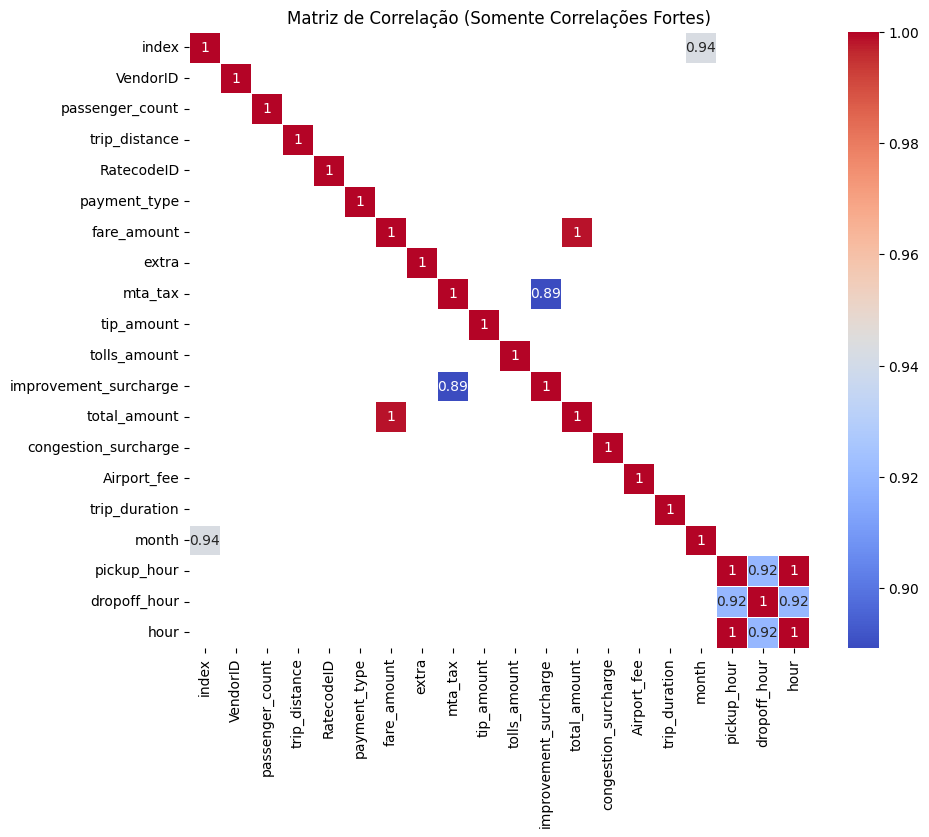

In [17]:
# Calcular a matriz de correlação apenas para colunas numéricas
correlation_matrix = taxis.select_dtypes(include=np.number).corr()

# Exibir a matriz de correlação com um mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.8)
plt.title("Matriz de Correlação entre Variáveis Numéricas")
plt.show()

# Filtrar correlações fortes (maiores que 0.7 ou menores que -0.7)
strong_correlations = correlation_matrix[(correlation_matrix > 0.7) | (correlation_matrix < -0.7)]
print("\nCorrelações fortes (maiores que 0.7 ou menores que -0.7):")
print(strong_correlations.dropna(how='all', axis=0).dropna(how='all', axis=1))

# Definir um limiar para filtrar correlações fortes
limiar = 0.7

# Filtrar correlações maiores que o limiar (positivas e negativas)
strong_corr = correlation_matrix[(correlation_matrix > limiar) | (correlation_matrix < -limiar)]

# Exibir a matriz de correlação filtrada
plt.figure(figsize=(10, 8))
sns.heatmap(strong_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matriz de Correlação (Somente Correlações Fortes)")
plt.show()

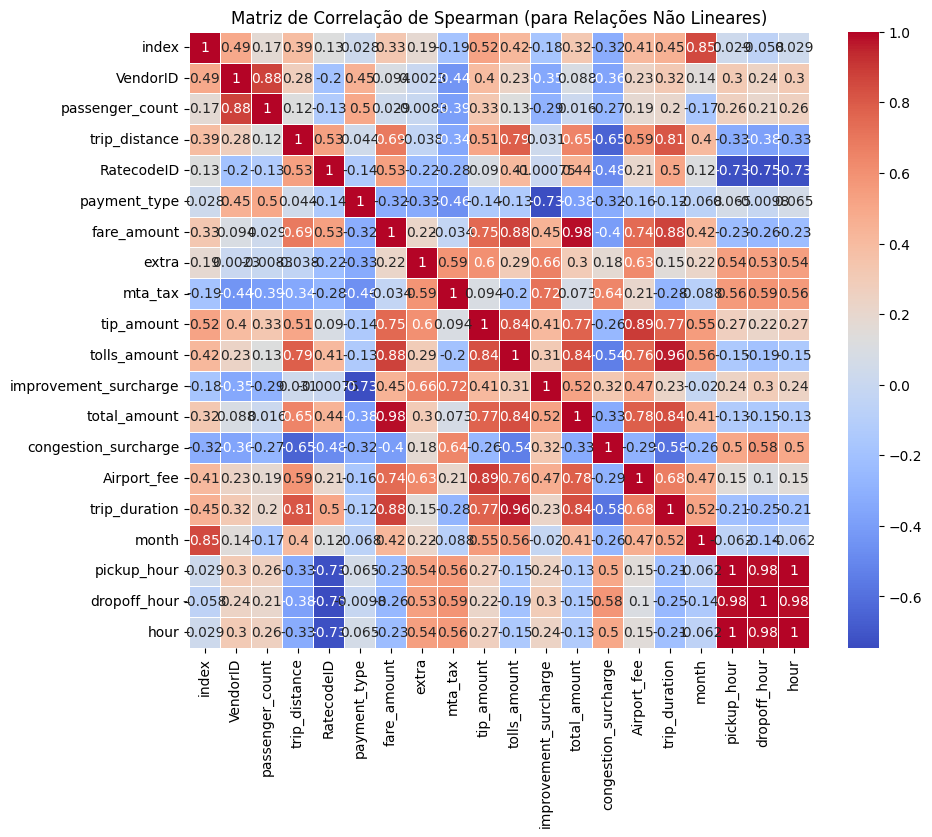

In [18]:
# Calcular a matriz de correlação de Spearman
spearman_corr_matrix = correlation_matrix.corr(method='spearman')

# Exibir o mapa de calor para Spearman
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matriz de Correlação de Spearman (para Relações Não Lineares)")
plt.show()

In [19]:
from scipy.stats import pearsonr

# Calcular a correlação de Pearson entre trip_distance e fare_amount e sua significância
corr_pearson, p_value = pearsonr(taxis['trip_distance'], taxis['fare_amount'])

print(f"Correlação de Pearson: {corr_pearson}")
print(f"P-valor: {p_value}")

if p_value < 0.05:
    print("A correlação é estatisticamente significativa.")
else:
    print("A correlação não é estatisticamente significativa.")

Correlação de Pearson: 0.002573745500886959
P-valor: 2.764014438119878e-16
A correlação é estatisticamente significativa.


# Datos Faltantes
Se analizó la presencia de datos faltantes o mal ingresados y se decidió cómo tratarlos.


In [20]:
taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10109133 entries, 0 to 10109132
Data columns (total 26 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   index                  int64         
 1   VendorID               int32         
 2   tpep_pickup_datetime   datetime64[us]
 3   tpep_dropoff_datetime  datetime64[us]
 4   passenger_count        float64       
 5   trip_distance          float64       
 6   RatecodeID             float64       
 7   store_and_fwd_flag     category      
 8   PULocationID           category      
 9   DOLocationID           category      
 10  payment_type           int64         
 11  fare_amount            float64       
 12  extra                  float64       
 13  mta_tax                float64       
 14  tip_amount             float64       
 15  tolls_amount           float64       
 16  improvement_surcharge  float64       
 17  total_amount           float64       
 18  congestion_surcharge

In [21]:
# Verificando as primeiras linhas do DataFrame combinado
print(taxis.head())

   index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0      0         1  2023-04-01 00:14:49   2023-04-01 00:45:01   
1      1         2  2023-04-01 00:00:24   2023-04-01 00:56:19   
2      2         1  2023-04-01 00:03:50   2023-04-01 00:14:42   
3      3         1  2023-04-01 00:53:18   2023-04-01 01:01:28   
4      4         2  2023-04-01 00:07:00   2023-04-01 00:17:16   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag PULocationID  \
0              2.0           4.90         1.0                  N           48   
1              1.0          21.89         2.0                  N          132   
2              2.0           1.30         1.0                  N          148   
3              1.0           1.50         1.0                  N          249   
4              2.0           1.49         1.0                  N          158   

  DOLocationID  ...  improvement_surcharge  total_amount  \
0          223  ...                    1.0          39.9   
1 

In [22]:
# Analisar os dados faltantes por variável
print("\nAnálise de Dados Faltantes por Coluna:")
for col in taxis.columns:
    percent_missing = taxis[col].isna().mean() * 100
    print(f"Coluna: {col} - Percentagem de valores faltantes: {percent_missing:.2f}%")
    if percent_missing > 0:
        print(f"Valores faltantes: {taxis[col].isna().sum()}")


Análise de Dados Faltantes por Coluna:
Coluna: index - Percentagem de valores faltantes: 0.00%
Coluna: VendorID - Percentagem de valores faltantes: 0.00%
Coluna: tpep_pickup_datetime - Percentagem de valores faltantes: 0.00%
Coluna: tpep_dropoff_datetime - Percentagem de valores faltantes: 0.00%
Coluna: passenger_count - Percentagem de valores faltantes: 2.89%
Valores faltantes: 292373
Coluna: trip_distance - Percentagem de valores faltantes: 0.00%
Coluna: RatecodeID - Percentagem de valores faltantes: 2.89%
Valores faltantes: 292373
Coluna: store_and_fwd_flag - Percentagem de valores faltantes: 2.89%
Valores faltantes: 292373
Coluna: PULocationID - Percentagem de valores faltantes: 0.00%
Coluna: DOLocationID - Percentagem de valores faltantes: 0.00%
Coluna: payment_type - Percentagem de valores faltantes: 0.00%
Coluna: fare_amount - Percentagem de valores faltantes: 0.00%
Coluna: extra - Percentagem de valores faltantes: 0.00%
Coluna: mta_tax - Percentagem de valores faltantes: 0.00%

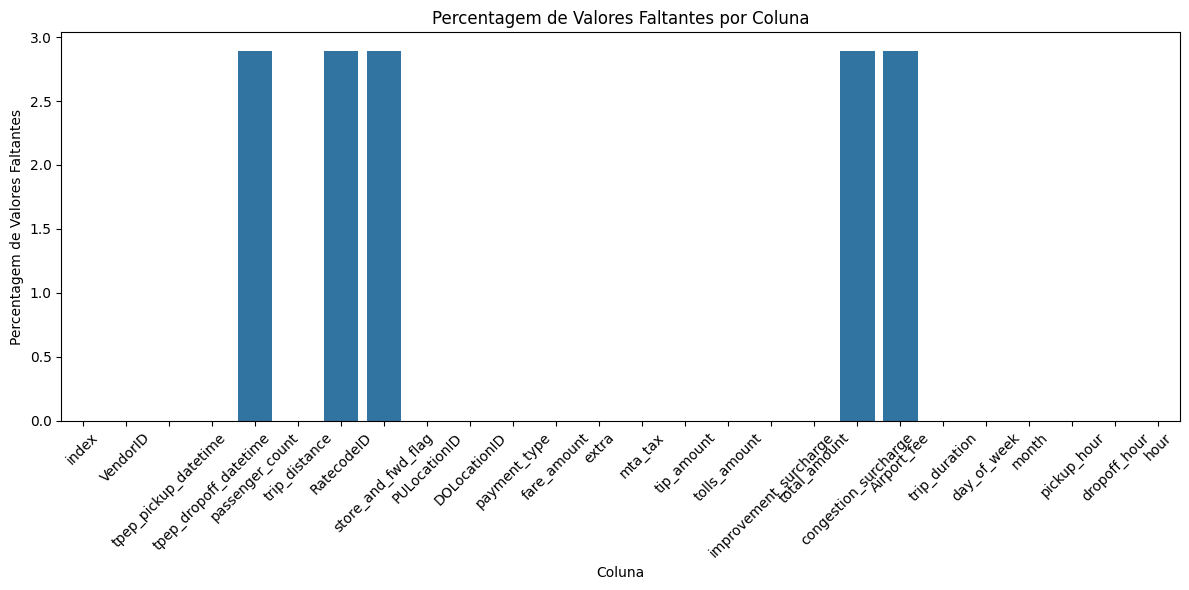

In [23]:
# Visualizar a percentagem de valores faltantes por coluna
taxis_null_percentage = (taxis.isnull().sum() / len(taxis) * 100)
plt.figure(figsize=(12, 6))
sns.barplot(x=taxis_null_percentage.index,
            y=taxis_null_percentage.values)
plt.title("Percentagem de Valores Faltantes por Coluna")
plt.ylabel("Percentagem de Valores Faltantes")
plt.xlabel("Coluna")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
# Calcular e exibindo o número de dados faltantes por registro
missing_per_row = taxis.isna().sum(axis=1)
missing_percent_per_row = (missing_per_row / len(taxis.columns)) * 100

# Exibir o resultado
print("Dados faltantes por registro:")
print(missing_per_row)
print("\nPercentagem de dados faltantes por registro:")
print(missing_percent_per_row)

Dados faltantes por registro:
0           0
1           0
2           0
3           0
4           0
           ..
10109128    5
10109129    5
10109130    5
10109131    5
10109132    5
Length: 10109133, dtype: int64

Percentagem de dados faltantes por registro:
0            0.000000
1            0.000000
2            0.000000
3            0.000000
4            0.000000
              ...    
10109128    19.230769
10109129    19.230769
10109130    19.230769
10109131    19.230769
10109132    19.230769
Length: 10109133, dtype: float64


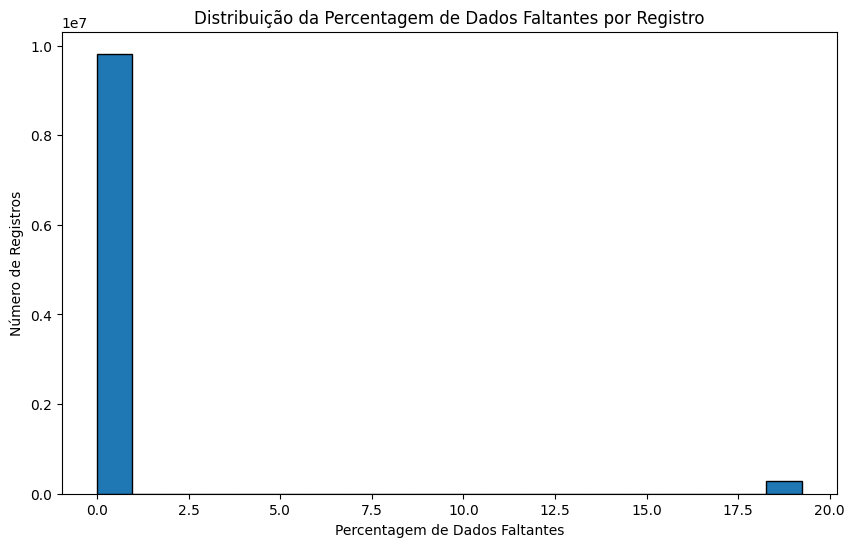

In [25]:
# Visualizar a distribuição da percentagem de dados faltantes por registro
plt.figure(figsize=(10, 6))
plt.hist(missing_percent_per_row, bins=20, edgecolor='black')
plt.title('Distribuição da Percentagem de Dados Faltantes por Registro')
plt.xlabel('Percentagem de Dados Faltantes')
plt.ylabel('Número de Registros')
plt.show()

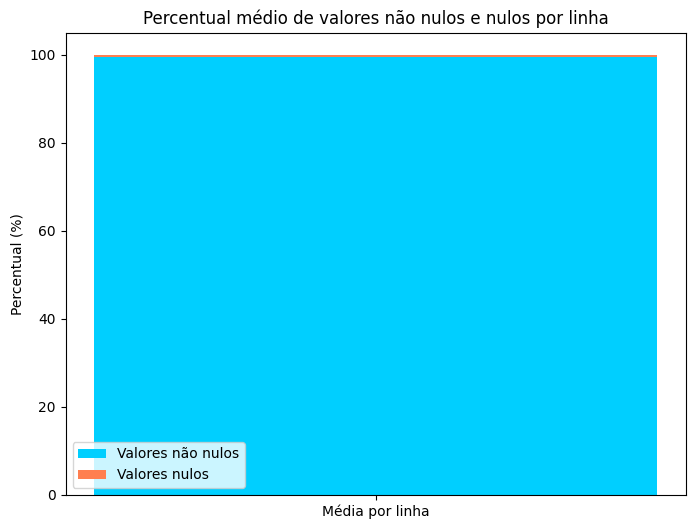

In [26]:
# Função para gerar gráfico do percentual de valores nulos e não nulos por registro (linha)
def grafico_porcentaje_nulls_por_fila(taxis):
    # Cálculo da média de valores não nulos e nulos por linha
    promedio_no_nulos = taxis.notnull().sum(axis=1).mean()
    promedio_nulos = taxis.isnull().sum(axis=1).mean()

    total = promedio_no_nulos + promedio_nulos

    # Cálculo do percentual de não nulos e nulos
    porcentaje_no_nulos = promedio_no_nulos / total * 100
    porcentaje_nulos = promedio_nulos / total * 100

    # Preparação dos dados para o gráfico
    etiquetas = ["Média por linha"]
    valores_no_nulos = [porcentaje_no_nulos]
    valores_nulos = [porcentaje_nulos]

    # Definição das cores
    CELESTE = "#00CFFF"
    CORAL = "#FF7F50"

    # Gerar gráfico de barras
    plt.figure(figsize=(8, 6))
    plt.bar(etiquetas, valores_no_nulos, color=CELESTE, label="Valores não nulos")
    plt.bar(etiquetas, valores_nulos, bottom=valores_no_nulos, color=CORAL, label="Valores nulos")

    plt.title("Percentual médio de valores não nulos e nulos por linha")
    plt.ylabel("Percentual (%)")
    plt.legend()
    plt.show()

# Chamar a função com o DataFrame taxis
grafico_porcentaje_nulls_por_fila(taxis)

In [27]:
# Tratamento de valores nulos com imputação
# Imputar valores faltantes nas colunas numéricas com a mediana
taxis['passenger_count'].fillna(taxis['passenger_count'].median(), inplace=True)
taxis['congestion_surcharge'].fillna(taxis['congestion_surcharge'].median(), inplace=True)
taxis['Airport_fee'].fillna(taxis['Airport_fee'].median(), inplace=True)

# Imputar valores faltantes nas colunas categóricas com a moda
taxis['RatecodeID'].fillna(taxis['RatecodeID'].mode()[0], inplace=True)
taxis['store_and_fwd_flag'].fillna(taxis['store_and_fwd_flag'].mode()[0], inplace=True)

In [28]:
# Exibir o dataset limpo
print("\nDataset após tratamento de nulos:")
taxis


Dataset após tratamento de nulos:


index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0                0         1  2023-04-01 00:14:49   2023-04-01 00:45:01   
1                1         2  2023-04-01 00:00:24   2023-04-01 00:56:19   
2                2         1  2023-04-01 00:03:50   2023-04-01 00:14:42   
3                3         1  2023-04-01 00:53:18   2023-04-01 01:01:28   
4                4         2  2023-04-01 00:07:00   2023-04-01 00:17:16   
...            ...       ...                  ...                   ...   
10109128  10109128         2  2023-06-30 23:30:21   2023-07-01 00:00:46   
10109129  10109129         1  2023-06-30 23:34:22   2023-07-01 00:32:59   
10109130  10109130         2  2023-06-30 23:45:00   2023-07-01 00:10:00   
10109131  10109131         2  2023-06-30 23:13:38   2023-06-30 23:51:19   
10109132  10109132         2  2023-06-30 23:18:00   2023-06-30 23:31:00   

          passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                     2.0           4.90         1.0                  N   
1                     1.0          21.89         2.0                  N   
2                     2.0           1.30         1.0                  N   
3                     1.0           1.50         1.0                  N   
4                     2.0           1.49         1.0                  N   
...                   ...            ...         ...                ...   
10109128              1.0           9.20         1.0                  N   
10109129              1.0          20.20         1.0                  N   
10109130              1.0           6.16         1.0                  N   
10109131              1.0          11.65         1.0                  N   
10109132              1.0           1.40         1.0                  N   

         PULocationID DOLocationID  ...  improvement_surcharge  total_amount  \
0                  48          223  ...                    1.0         39.90   
1                 132           43  ...                    1.0         81.80   
2                 148          113  ...                    1.0         18.40   
3                 249           79  ...                    1.0         16.00   
4                 158          246  ...                    1.0         17.40   
...               ...          ...  ...                    ...           ...   
10109128           42          148  ...                    1.0         51.04   
10109129          132           74  ...                    1.0         91.77   
10109130          256          140  ...                    1.0         38.44   
10109131           91          246  ...                    1.0         56.29   
10109132          164          230  ...                    1.0         18.35   

          congestion_surcharge  Airport_fee  trip_duration  day_of_week  \
0                          2.5         0.00      30.200000     Saturday   
1                          2.5         1.25      55.916667     Saturday   
2                          2.5         0.00      10.866667     Saturday   
3                          2.5         0.00       8.166667     Saturday   
4                          2.5         0.00      10.266667     Saturday   
...                        ...          ...            ...          ...   
10109128                   2.5         0.00      30.416667       Friday   
10109129                   2.5         0.00      58.616667       Friday   
10109130                   2.5         0.00      25.000000       Friday   
10109131                   2.5         0.00      37.683333       Friday   
10109132                   2.5         0.00      13.000000       Friday   

          month  pickup_hour  dropoff_hour  hour  
0             4            0             0     0  
1             4            0             0     0  
2             4            0             0     0  
3             4            0             1     0  
4             4            0             0     0  
...         ...          ...           ... 

In [29]:
# Verificar valores mal ingressados nas colunas numéricas (valores negativos)
print("Valores negativos na coluna 'fare_amount':", (taxis['fare_amount'] < 0).sum())
print("Valores negativos na coluna 'trip_distance':", (taxis['trip_distance'] < 0).sum())

# Verificar zeros em colunas onde não faz sentido (exemplo: fare_amount)
zeros_tarifa = taxis[taxis['fare_amount'] == 0]
print(f"Total de registros com tarifa zero: {len(zeros_tarifa)}")

# Verificar se a data de término da viagem é anterior à data de início (erro lógico)
data_errada = taxis[taxis['tpep_dropoff_datetime'] < taxis['tpep_pickup_datetime']]
print("Número de registros com data de término antes da data de início:", len(data_errada))

# Verificar datas futuras (por exemplo, se os dados são de 2023, mas a data está em 2024)
datas_futuras = taxis[taxis['tpep_pickup_datetime'] > '2023-12-31']
print("Número de registros com datas futuras:", len(datas_futuras))

# Verificar registros duplicados
duplicados = taxis.duplicated().sum()
print(f"Total de registros duplicados: {duplicados}")

# Verificar valores que deveriam ser tratados como nulos (ex: strings vazias ou "NULL")
taxis.replace("", np.nan, inplace=True)  # Substituir strings vazias por NaN
taxis.replace("NULL", np.nan, inplace=True)  # Substituir "NULL" por NaN
taxis.replace(-1, np.nan, inplace=True)  # Se -1 representa um valor inválido, substituir por NaN

# Verificar corridas com 0 passageiros mas com tarifas positivas
passageiros_0_tarifa_positiva = taxis[(taxis['passenger_count'] == 0) & (taxis['fare_amount'] > 0)]
print(f"Total de registros com 0 passageiros e tarifa positiva: {len(passageiros_0_tarifa_positiva)}")

Valores negativos na coluna 'fare_amount': 93525
Valores negativos na coluna 'trip_distance': 0
Total de registros com tarifa zero: 3385
Número de registros com data de término antes da data de início: 348
Número de registros com datas futuras: 0
Total de registros duplicados: 0
Total de registros com 0 passageiros e tarifa positiva: 170693


In [30]:
# Tratamento de dados mal ingressados
# Substituir valores negativos por NaN e imputar com a mediana
taxis['fare_amount'] = taxis['fare_amount'].apply(lambda x: np.nan if x < 0 else x)
taxis['fare_amount'].fillna(taxis['fare_amount'].median(), inplace=True)

# Substituir tarifas zero por NaN e imputar com a mediana
taxis['fare_amount'].replace(0, np.nan, inplace=True)
taxis['fare_amount'].fillna(taxis['fare_amount'].median(), inplace=True)

# Remover registros com data de término anterior à data de início
taxis = taxis[taxis['tpep_dropoff_datetime'] >= taxis['tpep_pickup_datetime']]

# Remover registros com 0 passageiros e tarifa positiva
taxis = taxis[~((taxis['passenger_count'] == 0) & (taxis['fare_amount'] > 0))]

In [31]:
# Verificar novamente se ainda há valores negativos, inconsistências de datas ou outros problemas
print("Valores negativos na coluna 'fare_amount':", (taxis['fare_amount'] < 0).sum())
print("Número de registros com data de término antes da data de início:", len(taxis[taxis['tpep_dropoff_datetime'] < taxis['tpep_pickup_datetime']]))
print("Total de registros com tarifa zero:", (taxis['fare_amount'] == 0).sum())
print("Total de registros com 0 passageiros e tarifa positiva:", len(taxis[(taxis['passenger_count'] == 0) & (taxis['fare_amount'] > 0)]))

Valores negativos na coluna 'fare_amount': 0
Número de registros com data de término antes da data de início: 0
Total de registros com tarifa zero: 0
Total de registros com 0 passageiros e tarifa positiva: 0


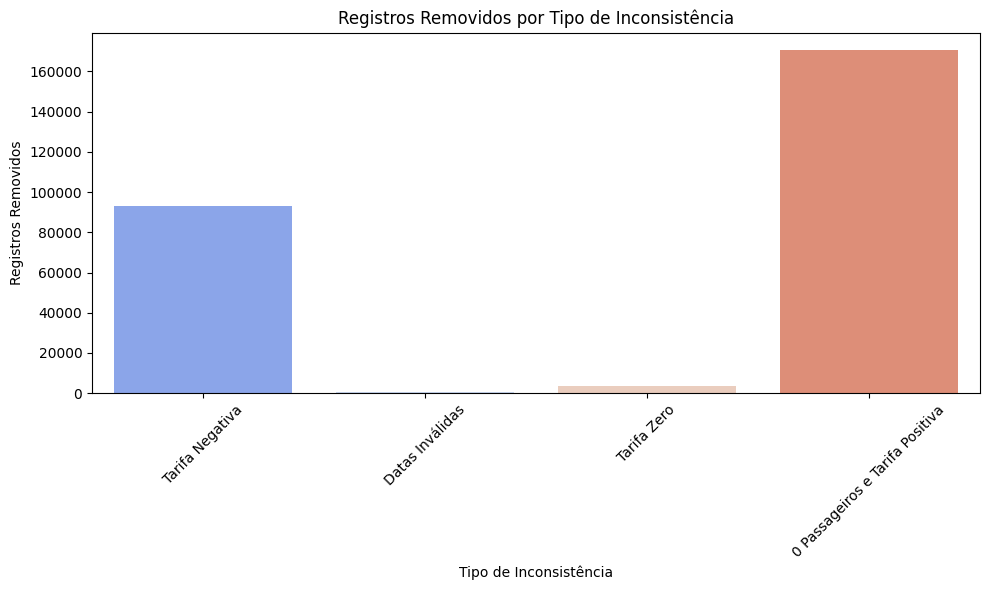

In [32]:
# Criar um dataset com a contagem de registros removidos por inconsistência
inconsistencias = {
    'Tarifa Negativa': 93230,
    'Datas Inválidas': 348,
    'Tarifa Zero': 3385,
    '0 Passageiros e Tarifa Positiva': 170693
}

# Converter para dataset para facilitar o gráfico
taxis_inconsistencias = pd.DataFrame(list(inconsistencias.items()), columns=['Tipo de Inconsistência', 'Registros Removidos'])

# Gráfico de barras das inconsistências
plt.figure(figsize=(10, 6))
sns.barplot(x='Tipo de Inconsistência', y='Registros Removidos', data=taxis_inconsistencias, palette='coolwarm')
plt.title('Registros Removidos por Tipo de Inconsistência')
plt.xlabel('Tipo de Inconsistência')
plt.ylabel('Registros Removidos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Valores Atipicos
En esta sección se han detectado valores atípicos en los datos, tanto en forma univariada como multivariada, y a continuación se procedió al tratamiento adecuado.

In [5]:
#Deteção de outliers pelo método IQR
def detectar_outliers_iqr(taxis, coluna):
    Q1 = taxis[coluna].quantile(0.25)
    Q3 = taxis[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Identificando os outliers
    outliers = taxis[(taxis[coluna] < limite_inferior) | (taxis[coluna] > limite_superior)]
    return outliers

# Variáveis quantitativas selecionadas automaticamente
variaveis_quantitativas = taxis.select_dtypes(include=np.number).columns

In [6]:
# Detecção de outliers e exibição de gráficos para todas as variáveis numéricas
for coluna in variaveis_quantitativas:
    outliers = detectar_outliers_iqr(taxis, coluna)

    # Se houver outliers, exibir o número e gerar o gráfico
    if len(outliers) > 0:
        print(f"Número de outliers na coluna {coluna}: {len(outliers)}")
    else:
        print(f"Não há outliers na coluna {coluna}.")

Número de outliers na coluna VendorID: 1967
Número de outliers na coluna passenger_count: 2462244
Número de outliers na coluna trip_distance: 1353997
Número de outliers na coluna RatecodeID: 566747
Número de outliers na coluna payment_type: 2191082
Número de outliers na coluna fare_amount: 1136415
Número de outliers na coluna extra: 196918
Número de outliers na coluna mta_tax: 185331
Número de outliers na coluna tip_amount: 789323
Número de outliers na coluna tolls_amount: 852268
Número de outliers na coluna improvement_surcharge: 102162
Número de outliers na coluna total_amount: 1280592
Número de outliers na coluna congestion_surcharge: 840494
Número de outliers na coluna Airport_fee: 846534
Número de outliers na coluna trip_duration: 635352
Número de outliers na coluna month: 12


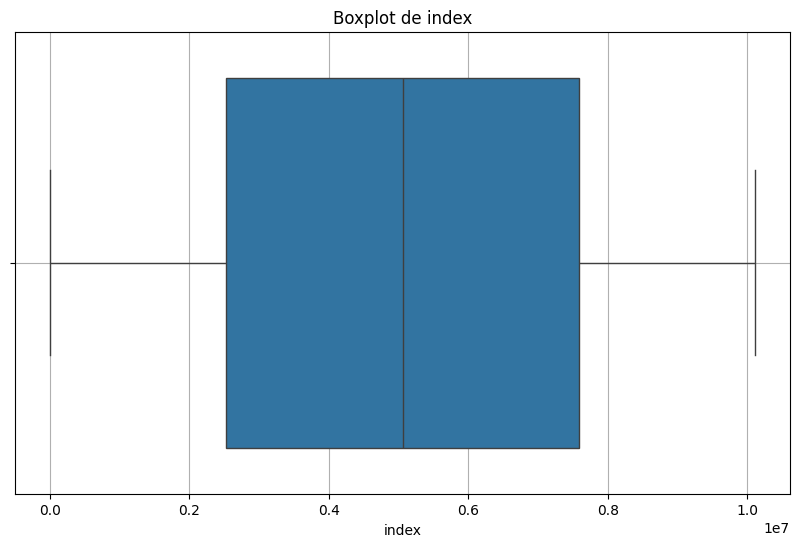

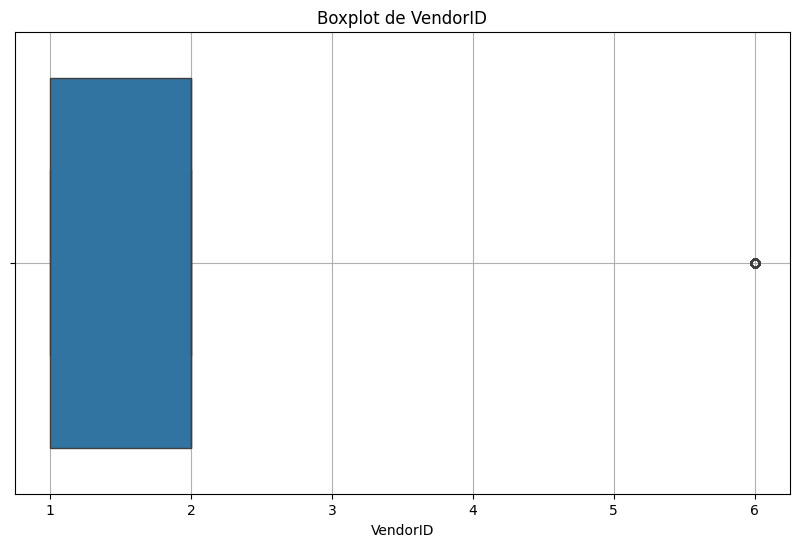

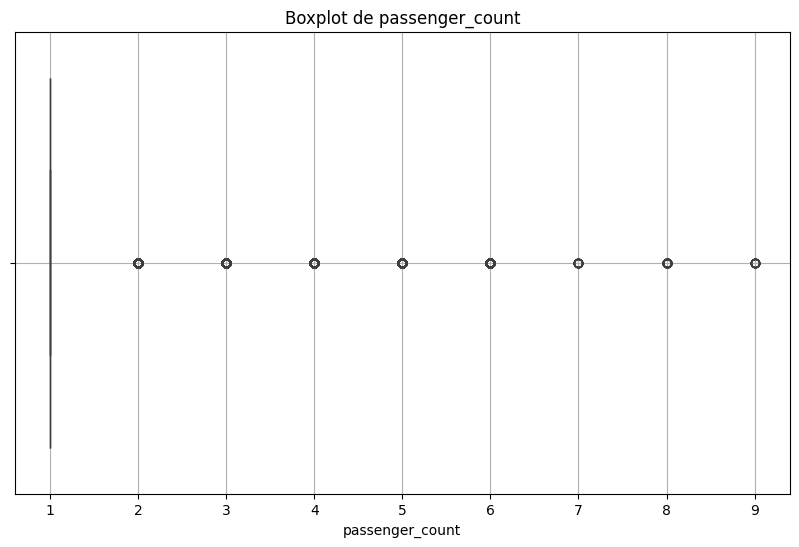

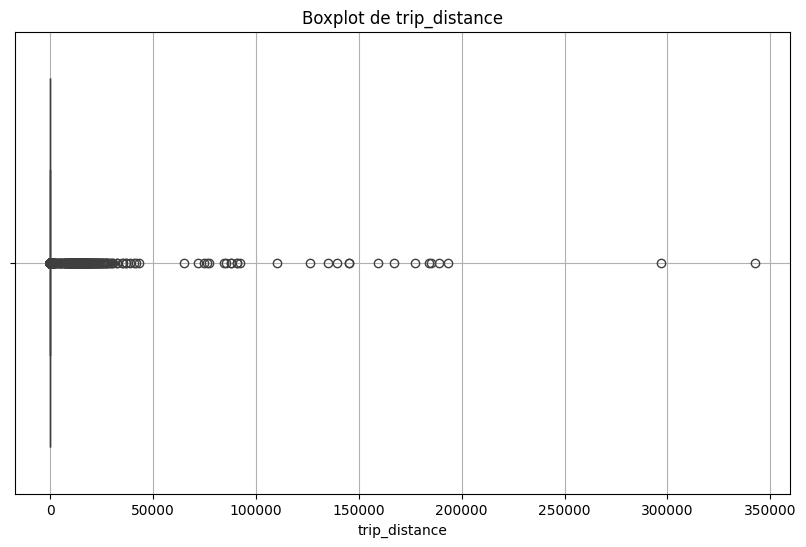

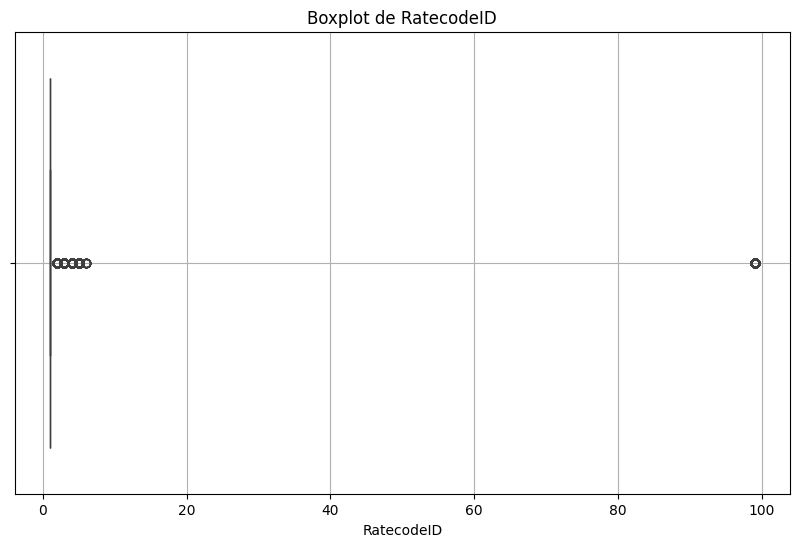

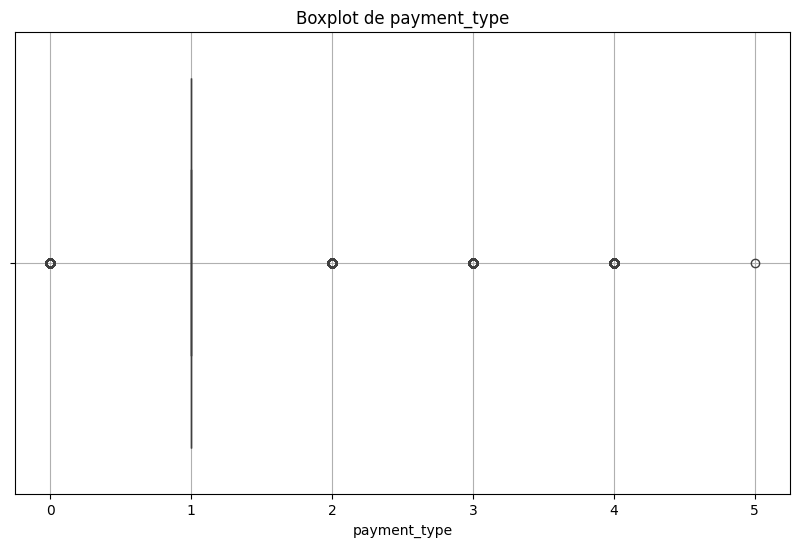

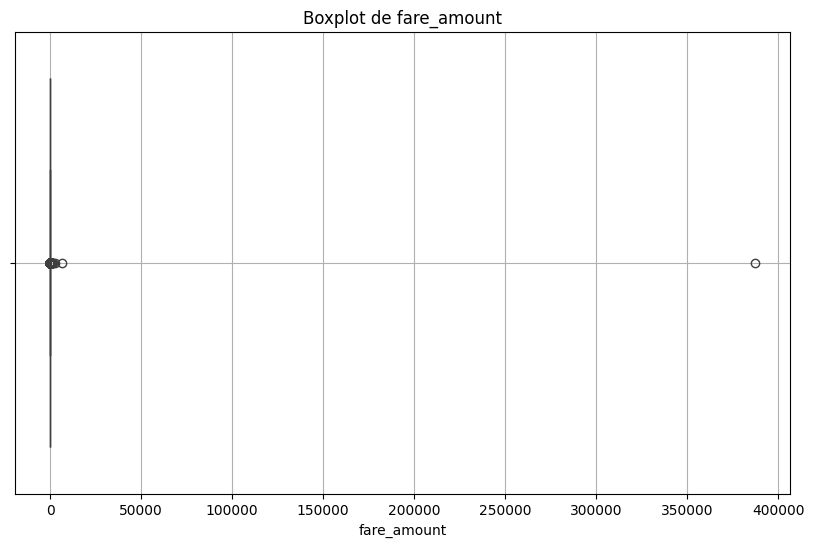

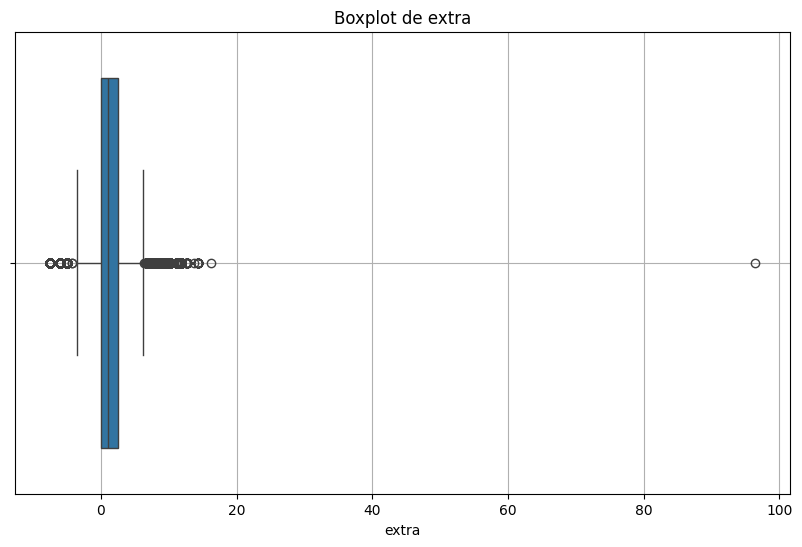

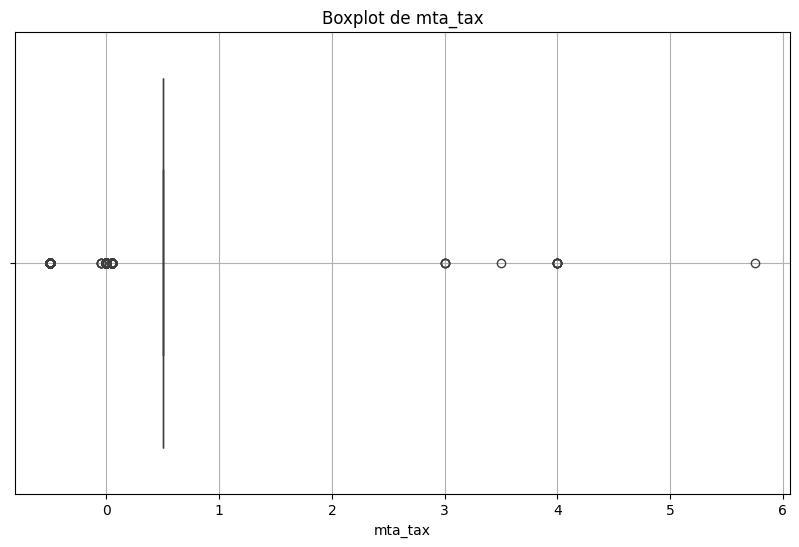

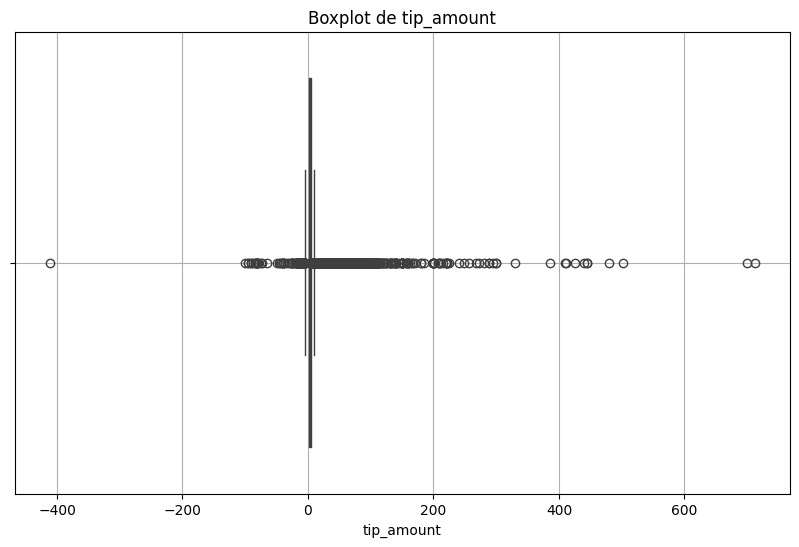

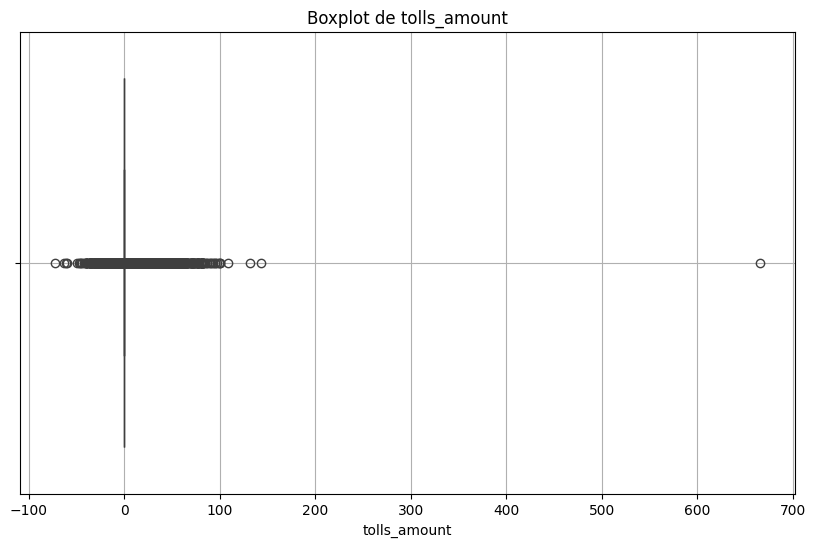

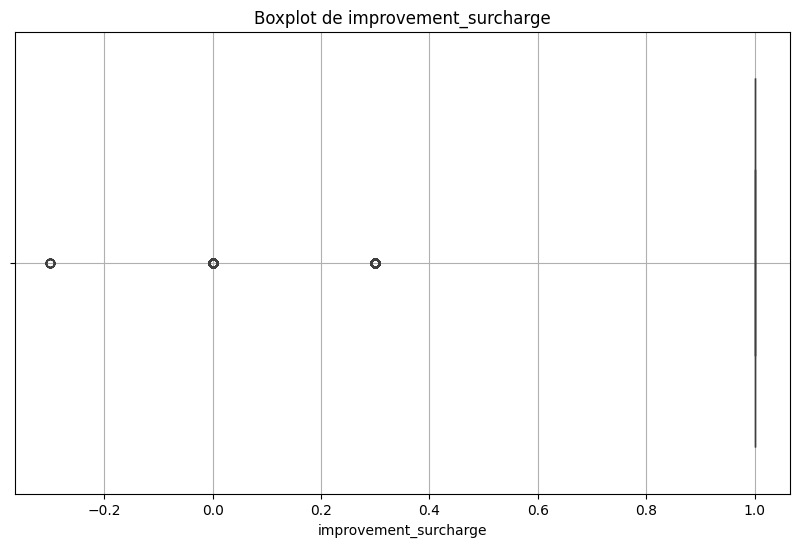

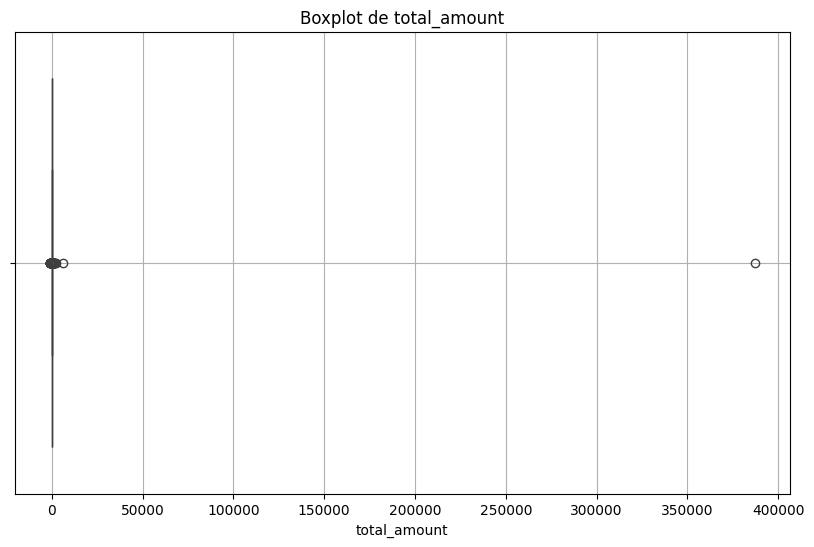

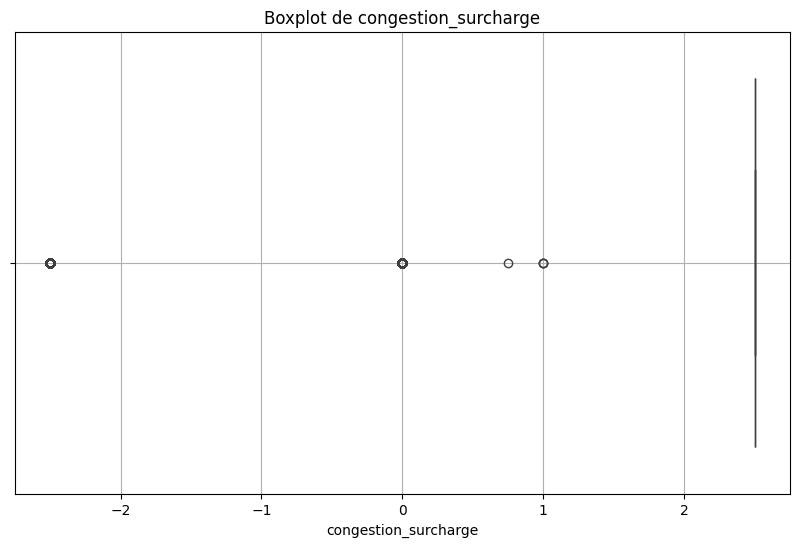

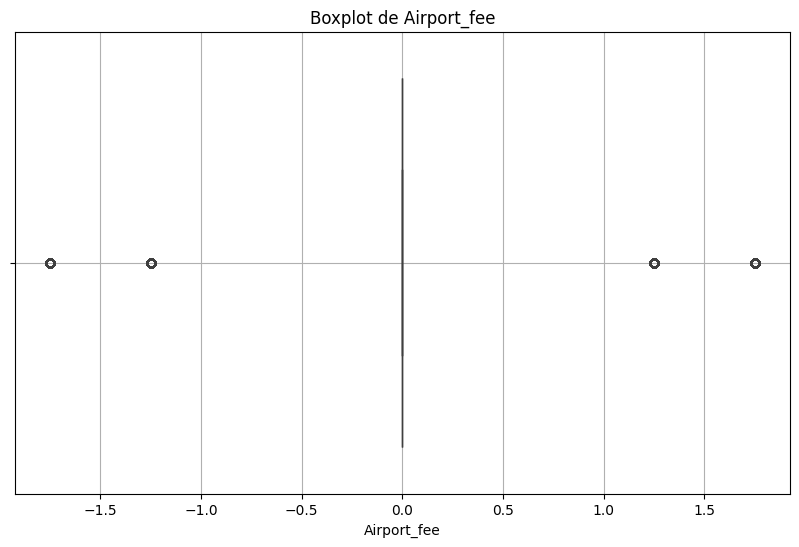

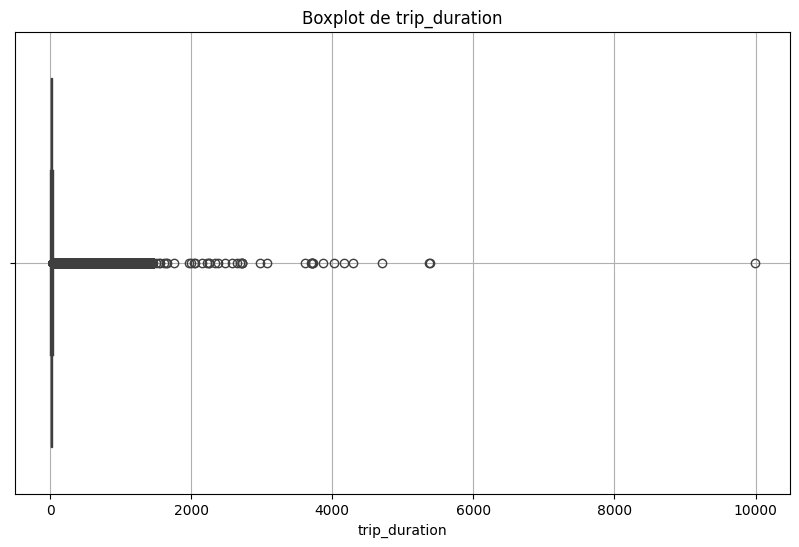

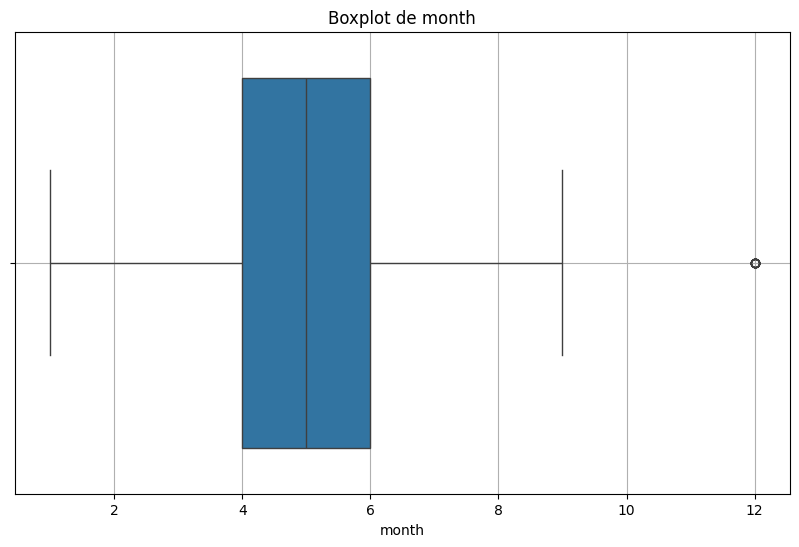

In [ ]:
# Boxplot para visualização dos valores atípicos
for column in variaveis_quantitativas:
  plt.figure(figsize=(10, 6))  # Ajuste o tamanho do gráfico
  sns.boxplot(data=taxis, x=column)
  plt.title(f"Boxplot de {column}")
  plt.xlabel(column)
  plt.grid(True)
  plt.show()

In [6]:
# Preencher valores ausentes com a mediana nas colunas numéricas e com a moda nas categóricas
taxis_imputed = taxis.copy()

# Preencher valores nas colunas numéricas
numeric_columns = taxis_imputed.select_dtypes(include='number').columns
taxis_imputed[numeric_columns] = taxis_imputed[numeric_columns].fillna(taxis_imputed[numeric_columns].median())

# Preencher valores nas colunas categóricas
categorical_columns = taxis_imputed.select_dtypes(include='category').columns
for col in categorical_columns:
    taxis_imputed[col] = taxis_imputed[col].fillna(taxis_imputed[col].mode()[0])

# Exibir os resultados para verificar a imputação
taxis_imputed.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
trip_duration            0
day_of_week              0
month                    0
dtype: int64

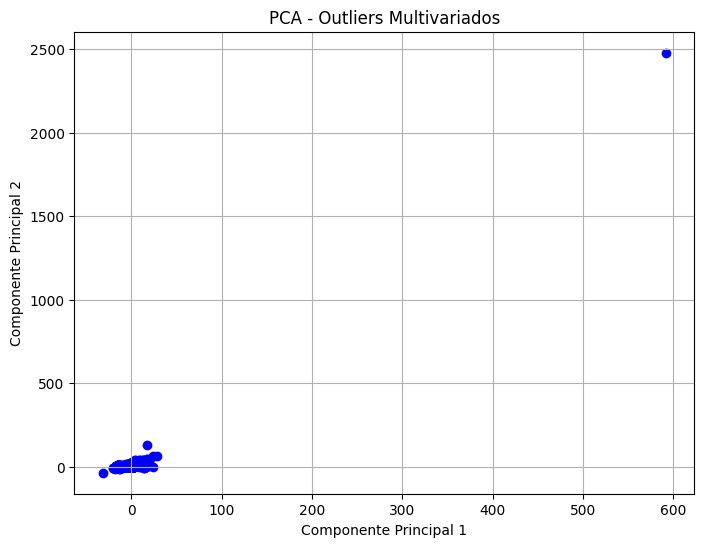

Variância explicada pelos dois primeiros componentes: 31.32%
Número de outliers multivariados detectados pelo PCA: 835233


In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Escalar os dados numéricos antes de aplicar o PCA
scaler = StandardScaler()
numeric_data = taxis_imputed.select_dtypes(include='number')

# Aplicar o escalonamento
scaled_data = scaler.fit_transform(numeric_data)

# Aplicar PCA para reduzir a dimensionalidade (2 componentes principais)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Visualizar os resultados dos componentes principais em um gráfico de dispersão
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', marker='o')
plt.title('PCA - Outliers Multivariados')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

# Você também pode verificar a variância explicada pelos componentes principais
print(f'Variância explicada pelos dois primeiros componentes: {pca.explained_variance_ratio_.sum() * 100:.2f}%')

# Se quiser identificar os outliers com base na distância dos componentes principais
outlier_threshold = 2.5  # Defina um limite para identificar outliers
outliers_pca = pca_result[(pca_result[:, 0] > outlier_threshold) | (pca_result[:, 1] > outlier_threshold)]
print(f"Número de outliers multivariados detectados pelo PCA: {len(outliers_pca)}")

In [8]:
# Adicionar o resultado do PCA ao DataFrame original
taxis['PCA1'] = pca_result[:, 0]
taxis['PCA2'] = pca_result[:, 1]

# Identificar outliers usando uma técnica simples, como distância > limiar
limiar = 3  # Definir o limiar de "outliers" nos componentes principais
outliers_pca = taxis[(taxis['PCA1'].abs() > limiar) | (taxis['PCA2'].abs() > limiar)]

print(f"Número de outliers multivariados detectados pelo PCA: {len(outliers_pca)}")

Número de outliers multivariados detectados pelo PCA: 732625


In [6]:
#Tratamento - Capping para variaveis numéricas
# Criar uma cópia do dataframe original para aplicar o capping
taxis_cap = taxis.copy()

# Função para aplicar capping (limitação) de valores com base no IQR
def capping_iqr(taxis_cap, coluna):
    Q1 = taxis_cap[coluna].quantile(0.25)
    Q3 = taxis_cap[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Limitar os valores outliers com base nos limites inferior e superior
    taxis_cap[coluna] = np.where(taxis_cap[coluna] < limite_inferior, limite_inferior, taxis_cap[coluna])
    taxis_cap[coluna] = np.where(taxis_cap[coluna] > limite_superior, limite_superior, taxis_cap[coluna])

# Aplicar capping nas variáveis quantitativas
for coluna in variaveis_quantitativas:
    capping_iqr(taxis_cap, coluna)

# Exibir a descrição dos dados após o capping
print("Dados após aplicar capping (limitação de outliers):")
print(taxis_cap.describe())

NameError: name 'variaveis_quantitativas' is not defined

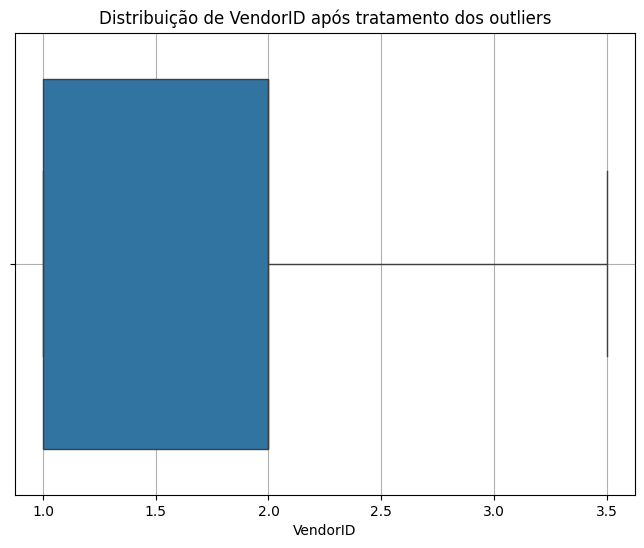

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/seaborn/_base.py", line 1768, in categorical_order
    order = vector.cat.categories
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 6299, in __getattr__
    return object.__getattribute__(self, name)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/accessor.py", line 224, in __get__
    accessor_obj = self._accessor(obj)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/categorical.py", line 2898, in __init__
    self._validate(data)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/categorical.py", line 2907, in _validate
    raise AttributeError("Can only use .cat accessor with a 'category' dtype")
AttributeError: Can only use .cat accessor with a 'category' dtype

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/

TypeError: object of type 'NoneType' has no len()

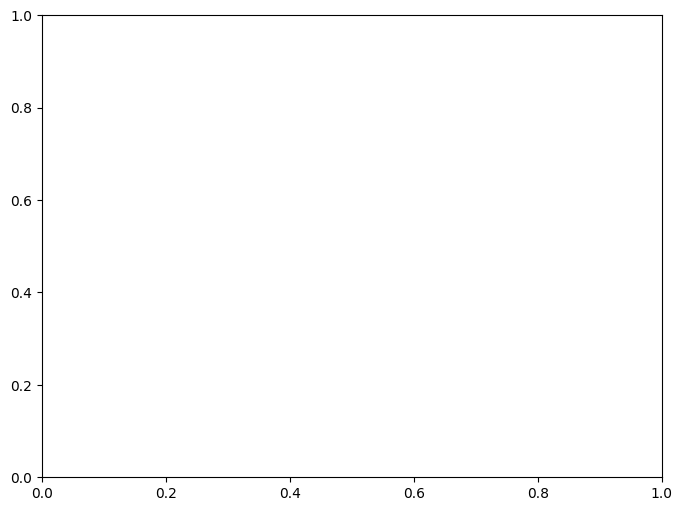

In [9]:
# Exibir boxplot após o tratamento
for coluna in variaveis_quantitativas:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=taxis_cap[coluna])
    plt.title(f"Distribuição de {coluna} após tratamento dos outliers")
    plt.grid(True)
    plt.show()

In [7]:
# Tratamento - Remoção para outliers irrelevantes ou inválidos
# Criar uma cópia do dataframe original para aplicar a remoção de outliers
taxis_remov = taxis.copy()

# Remover outliers irrelevantes ou inválidos, como valores negativos ou inconsistentes
taxis_remov = taxis_remov[
    (taxis_remov['fare_amount'] >= 0) &  # Remover tarifas negativas
    (taxis_remov['trip_distance'] > 0) &  # Remover corridas com distância zero
    (taxis_remov['passenger_count'] > 0)  # Remover registros com zero passageiros
]

# Exibir o número de registros após a remoção de outliers
print(f"Número de registros após remoção de outliers inválidos: {len(taxis_remov)}")

# Exibir a descrição dos dados tratados
print("Dados após remoção de outliers:")
print(taxis_remov.describe())

Número de registros após remoção de outliers inválidos: 9445786
Dados após remoção de outliers:
           VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  9.445786e+06                     9445786                     9445786   
mean   1.744827e+00  2023-05-16 10:25:54.608209  2023-05-16 10:43:41.086868   
min    1.000000e+00         2001-01-01 00:07:36         2001-01-01 00:16:31   
25%    1.000000e+00  2023-04-24 09:56:37.250000  2023-04-24 10:15:07.500000   
50%    2.000000e+00  2023-05-16 09:34:26.500000         2023-05-16 09:54:37   
75%    2.000000e+00         2023-06-07 18:53:40         2023-06-07 19:09:28   
max    2.000000e+00         2023-09-05 18:20:48         2023-09-05 18:24:21   
std    4.359583e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  payment_type  \
count     9.445786e+06   9.445786e+06  9.445786e+06  9.445786e+06   
mean      1.395220e+00   3.672585e+00  1.512562e+00  1

In [ ]:
# Exibir boxplot após o tratamento
for coluna in variaveis_quantitativas:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=taxis_remov[coluna])
    plt.title(f"Distribuição de {coluna} após remoção dos outliers")
    plt.grid(True)
    plt.show()

In [ ]:
# Comparar antes e depois do tratamento - Capping
# Exibir gráficos
for coluna in variaveis_quantitativas:
    plt.figure(figsize=(12, 6))

    # Antes do capping
    plt.subplot(1, 2, 1)
    sns.histplot(taxis[coluna], kde=True, bins=30)
    plt.title(f"Distribuição original de {coluna}")
    plt.grid(True)

    # Depois do capping
    plt.subplot(1, 2, 2)
    sns.histplot(taxis_cap[coluna], kde=True, bins=30)
    plt.title(f"Distribuição após Capping de {coluna}")
    plt.grid(True)

    plt.show()

In [ ]:
# Comparar antes e depois do tratamento - Capping
# Exibir gráficos
for coluna in variaveis_quantitativas:
    plt.figure(figsize=(12, 6))

    # Antes da remoção de outliers
    plt.subplot(1, 2, 1)
    sns.histplot(taxis[coluna], kde=True, bins=30)
    plt.title(f"Distribuição original de {coluna}")
    plt.grid(True)

    # Depois da remoção de outliers
    plt.subplot(1, 2, 2)
    sns.histplot(taxis_remov[coluna], kde=True, bins=30)
    plt.title(f"Distribuição após Remoção de Outliers de {coluna}")
    plt.grid(True)

    plt.show()

In [ ]:
# Comparar Estatísticas Descritivas
# Função para exibir estatísticas descritivas resumidas
def comparar_estatisticas(dataset, nome_dataset):
    print(f"Estatísticas Descritivas de {nome_dataset}:")
    print(dataset.describe())

# Comparar as estatísticas descritivas dos três datasets
print("Dataset Original (Sem Tratamento):")
comparar_estatisticas(taxis, "Original")

print("\nDataset com Capping Aplicado:")
comparar_estatisticas(taxis_cap, "Capping")

print("\nDataset com Remoção de Outliers:")
comparar_estatisticas(taxis_remov, "Remoção de Outliers")

In [8]:
# Comparar o número de registros nos três datasets
print(f"Registros no dataset original: {len(taxis)}")
print(f"Registros após capping: {len(taxis_cap)}")
print(f"Registros após remoção de outliers: {len(taxis_remov)}")

Registros no dataset original: 10109133
Registros após capping: 10109133
Registros após remoção de outliers: 9445786


In [ ]:
# Comparar média, mediana e desvio padrão
def comparar_tendencia(variavel):
    print(f"\nAnálise da variável: {variavel}")
    print(f"Original: Média={taxis[variavel].mean()}, Mediana={taxis[variavel].median()}, Desvio Padrão={taxis[variavel].std()}")
    print(f"Capping: Média={taxis_cap[variavel].mean()}, Mediana={taxis_cap[variavel].median()}, Desvio Padrão={taxis_cap[variavel].std()}")
    print(f"Remoção: Média={taxis_remov[variavel].mean()}, Mediana={taxis_remov[variavel].median()}, Desvio Padrão={taxis_remov[variavel].std()}")

# Comparar para todas as variáveis quantitativas
for variavel in variaveis_quantitativas:
    comparar_tendencia(variavel)

In [ ]:
# Visualizar gráficos
# Função para comparar e visualizar tendência
def visualizar_comparacao_tendencia(variavel):
    # Valores de média, mediana e desvio padrão
    original = [taxis[variavel].mean(), taxis[variavel].median(), taxis[variavel].std()]
    capping = [taxis_cap[variavel].mean(), taxis_cap[variavel].median(), taxis_cap[variavel].std()]
    remocao = [taxis_remov[variavel].mean(), taxis_remov[variavel].median(), taxis_remov[variavel].std()]

    labels = ['Média', 'Mediana', 'Desvio Padrão']
    x = np.arange(len(labels))  # Posições das barras

    # Tamanho do gráfico
    plt.figure(figsize=(10, 6))

    # Plotar barras
    plt.bar(x - 0.2, original, 0.2, label='Original', color='blue')
    plt.bar(x, capping, 0.2, label='Capping', color='green')
    plt.bar(x + 0.2, remocao, 0.2, label='Remoção', color='red')

    # Título e rótulos
    plt.title(f"Comparação de Tendência para {variavel}")
    plt.xticks(x, labels)
    plt.ylabel('Valor')

    # Mostrar legenda
    plt.legend()
    plt.grid(True)
    plt.show()

# Gerar gráfico para cada variável quantitativa
for variavel in variaveis_quantitativas:
    visualizar_comparacao_tendencia(variavel)

# Nuevos Features
Se añadieron nuevas variables para mejorar el análisis exploratorio de los datos.

In [9]:
# Exemplo de DataFrame de taxis
data = {
    'fare_amount': [10, 15, 20, 30, 50],
    'trip_distance': [1.0, 2.0, 3.0, 4.0, 5.0],
    'pickup_datetime': pd.to_datetime(['2024-01-01 10:00', '2024-01-01 10:30', '2024-01-01 11:00',
                                        '2024-01-01 11:30', '2024-01-01 12:00']),
    'passenger_count': [1, 2, 1, 3, 1]
}

# Criar DataFrame
taxis = pd.DataFrame(data)

# Criar uma nova variável para o preço por distância
taxis['price_per_mile'] = taxis['fare_amount'] / taxis['trip_distance']

# Criar uma nova variável para a hora do dia
taxis['pickup_hour'] = taxis['pickup_datetime'].dt.hour

# Criar uma variável que categoriza a distância da viagem
taxis['distance_category'] = pd.cut(taxis['trip_distance'], bins=[0, 2, 4, 6], labels=['short', 'medium', 'long'])

# Criar uma nova variável que indica se o número de passageiros é alto ou baixo
taxis['passenger_count_category'] = taxis['passenger_count'].apply(lambda x: 'high' if x > 2 else 'low')

# Criar uma nova variável para a duração da viagem em minutos (exemplo fictício para fim ilustrativo)
taxis['dropoff_datetime'] = pd.to_datetime(['2024-01-01 10:20', '2024-01-01 10:50', '2024-01-01 11:10',
                                           '2024-01-01 12:00', '2024-01-01 12:10'])
taxis['trip_duration'] = (taxis['dropoff_datetime'] - taxis['pickup_datetime']).dt.total_seconds() / 60

# Criar uma variável que indica o período do dia
taxis['time_of_day'] = pd.cut(taxis['pickup_hour'], bins=[0, 6, 12, 18, 24],
                               labels=['night', 'morning', 'afternoon', 'evening'], right=False)

# Criar uma nova variável para o custo total por passageiro
taxis['cost_per_passenger'] = taxis['fare_amount'] / taxis['passenger_count'].replace(0, 1)  # Evitar divisão por zero

# Variáveis adicionais criadas
taxis['fare_per_minute'] = taxis['fare_amount'] / taxis['trip_duration'].replace(0, 1)  # Evitar divisão por zero
taxis['distance_per_passenger'] = taxis['trip_distance'] / taxis['passenger_count'].replace(0, 1)  # Evitar divisão por zero
taxis['pickup_weekday'] = taxis['pickup_datetime'].dt.day_name()
taxis['trip_speed'] = taxis['trip_distance'] / (taxis['trip_duration'] / 60).replace(0, 1)  # Duração em horas
taxis['is_weekend'] = taxis['pickup_weekday'].isin(['Saturday', 'Sunday']).astype(int)
taxis['trip_season'] = pd.cut(taxis['pickup_datetime'].dt.month,
                               bins=[0, 2, 5, 8, 11, 12],
                               labels=['Winter', 'Spring', 'Summer', 'Fall', 'Winter_2'],
                               right=False)

# Exibir o DataFrame resultante
print(taxis)

   fare_amount  trip_distance     pickup_datetime  passenger_count  \
0           10            1.0 2024-01-01 10:00:00                1   
1           15            2.0 2024-01-01 10:30:00                2   
2           20            3.0 2024-01-01 11:00:00                1   
3           30            4.0 2024-01-01 11:30:00                3   
4           50            5.0 2024-01-01 12:00:00                1   

   price_per_mile  pickup_hour distance_category passenger_count_category  \
0       10.000000           10             short                      low   
1        7.500000           10             short                      low   
2        6.666667           11            medium                      low   
3        7.500000           11            medium                     high   
4       10.000000           12              long                      low   

     dropoff_datetime  trip_duration time_of_day  cost_per_passenger  \
0 2024-01-01 10:20:00           20.0     mor

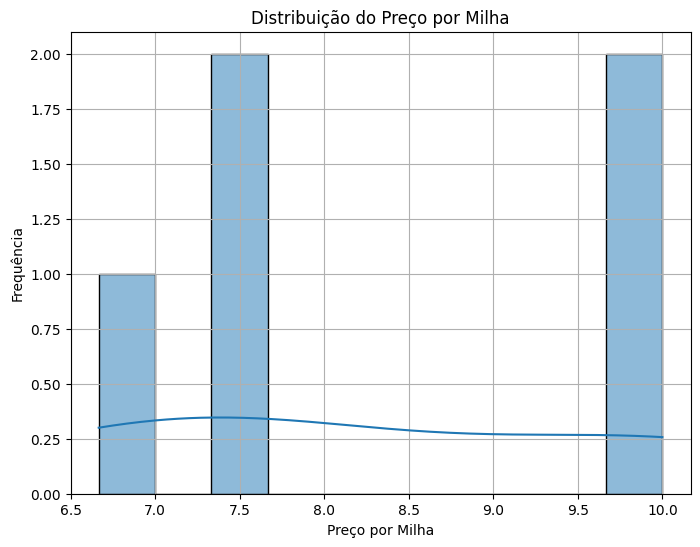

In [10]:
# Gráficos para analisar as novas variáveis criadas
# Analisar a distribuição do preço por milha
plt.figure(figsize=(8, 6))
sns.histplot(taxis['price_per_mile'], bins=10, kde=True)
plt.title('Distribuição do Preço por Milha')
plt.xlabel('Preço por Milha')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

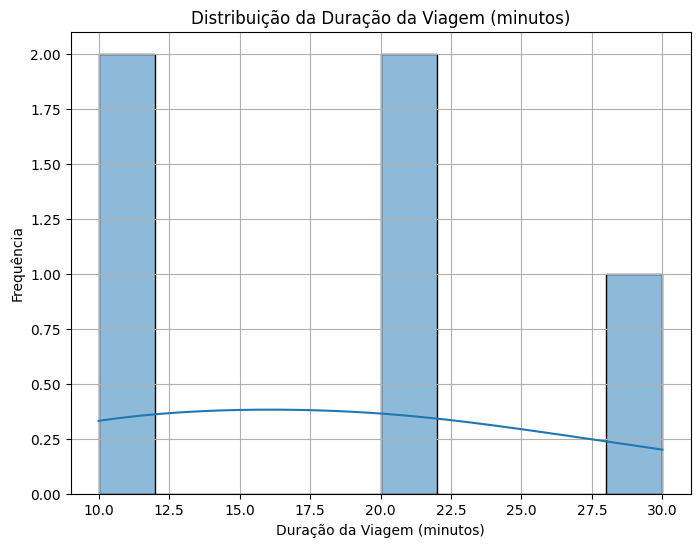

In [11]:
# Analisar a distribuição da duração da viagem
plt.figure(figsize=(8, 6))
sns.histplot(taxis['trip_duration'], bins=10, kde=True)
plt.title('Distribuição da Duração da Viagem (minutos)')
plt.xlabel('Duração da Viagem (minutos)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

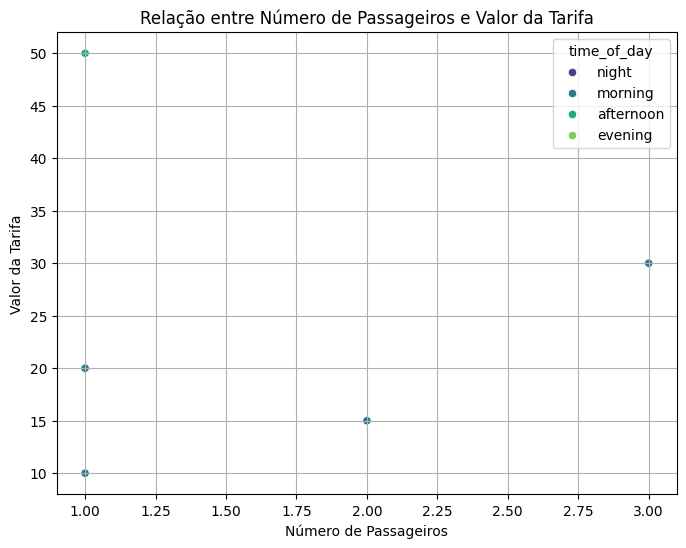

In [12]:
# Analisar a relação entre preço e número de passageiros
plt.figure(figsize=(8, 6))
sns.scatterplot(x=taxis['passenger_count'], y=taxis['fare_amount'], hue=taxis['time_of_day'], palette='viridis')
plt.title('Relação entre Número de Passageiros e Valor da Tarifa')
plt.xlabel('Número de Passageiros')
plt.ylabel('Valor da Tarifa')
plt.grid(True)
plt.show()

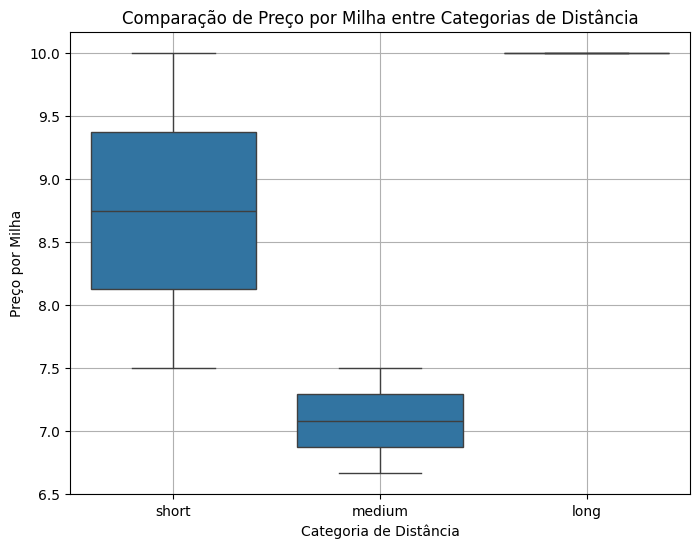

In [13]:
# Comparar o preço por milha entre diferentes categorias de distância
plt.figure(figsize=(8, 6))
sns.boxplot(x=taxis['distance_category'], y=taxis['price_per_mile'])
plt.title('Comparação de Preço por Milha entre Categorias de Distância')
plt.xlabel('Categoria de Distância')
plt.ylabel('Preço por Milha')
plt.grid(True)
plt.show()

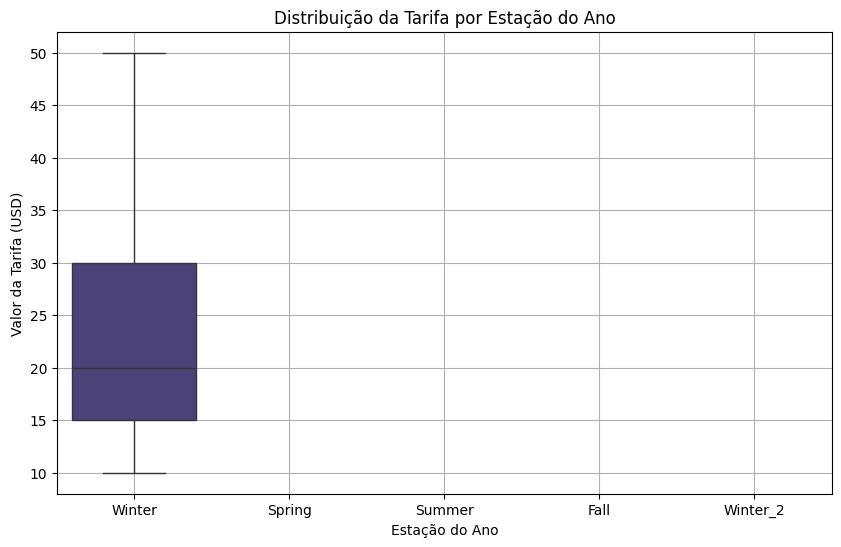

In [14]:
# Gráfico de Boxplot para a relação entre 'trip_season' e 'fare_amount'
plt.figure(figsize=(10, 6))
sns.boxplot(x='trip_season', y='fare_amount', data=taxis, palette='viridis')
plt.title("Distribuição da Tarifa por Estação do Ano")
plt.xlabel("Estação do Ano")
plt.ylabel("Valor da Tarifa (USD)")
plt.grid(True)
plt.show()

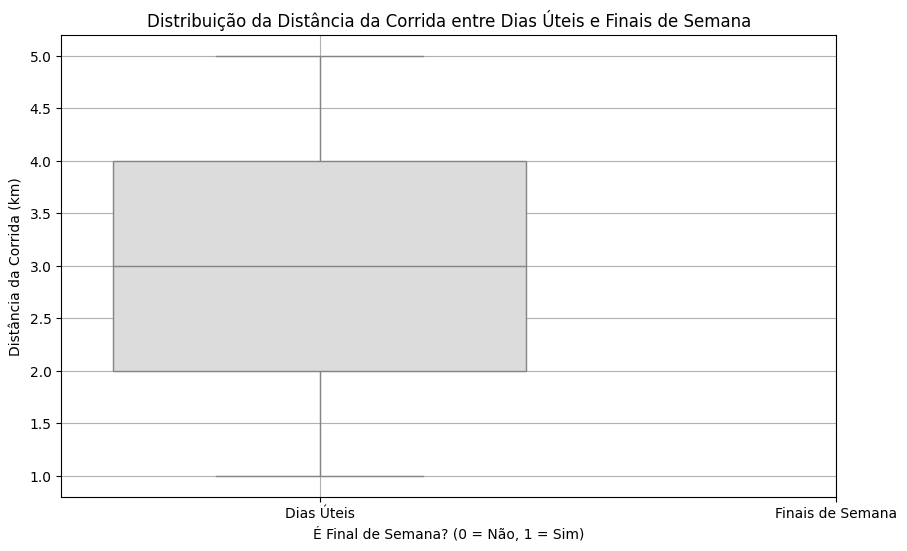

In [15]:
# Gráfico de Boxplot para a relação entre 'is_weekend' e 'trip_distance'
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_weekend', y='trip_distance', data=taxis, palette='coolwarm')
plt.title("Distribuição da Distância da Corrida entre Dias Úteis e Finais de Semana")
plt.xlabel("É Final de Semana? (0 = Não, 1 = Sim)")
plt.ylabel("Distância da Corrida (km)")
plt.xticks([0, 1], ['Dias Úteis', 'Finais de Semana'])
plt.grid(True)
plt.show()

Distribuição de viagens por estação do ano:
trip_season
Winter      5
Spring      0
Summer      0
Fall        0
Winter_2    0
Name: count, dtype: int64

Verificar as primeiras linhas de 'pickup_datetime' e 'trip_season':
      pickup_datetime trip_season
0 2024-01-01 10:00:00      Winter
1 2024-01-01 10:30:00      Winter
2 2024-01-01 11:00:00      Winter
3 2024-01-01 11:30:00      Winter
4 2024-01-01 12:00:00      Winter


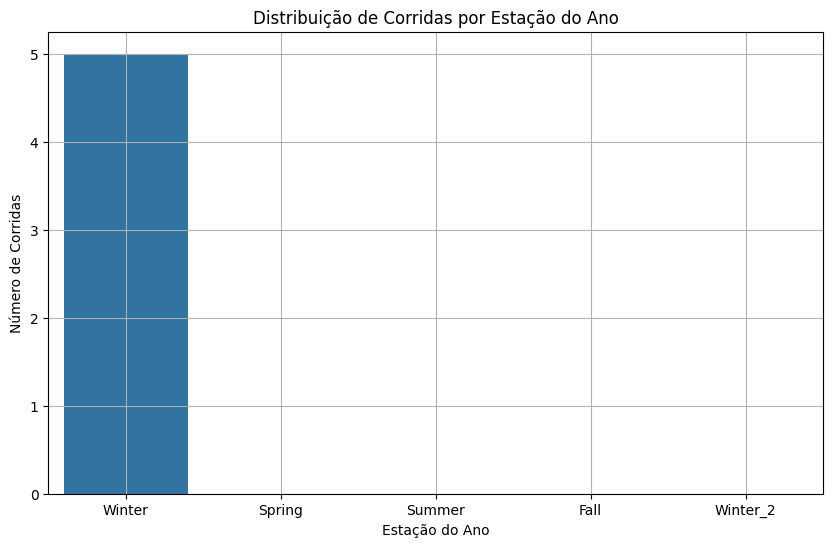

In [32]:
# Verificar a distribuição de viagens por estação do ano
print("Distribuição de viagens por estação do ano:")
print(taxis['trip_season'].value_counts())

# Verificar se as estações foram corretamente atribuídas
print("\nVerificar as primeiras linhas de 'pickup_datetime' e 'trip_season':")
print(taxis[['pickup_datetime', 'trip_season']].head())

# Visualização simples de contagem de viagens por estação do ano
plt.figure(figsize=(10, 6))
sns.countplot(data=taxis, x='trip_season', order=['Winter', 'Spring', 'Summer', 'Fall', 'Winter_2'])
plt.title('Distribuição de Corridas por Estação do Ano')
plt.xlabel('Estação do Ano')
plt.ylabel('Número de Corridas')
plt.grid(True)
plt.show()

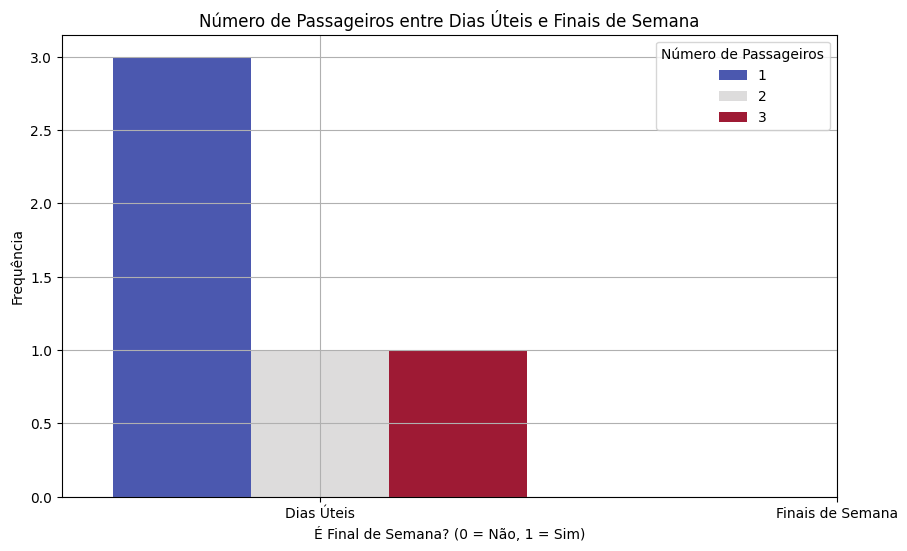

In [17]:
# Gráfico de barras empilhadas para 'is_weekend' e 'passenger_count'
plt.figure(figsize=(10, 6))
sns.countplot(x='is_weekend', hue='passenger_count', data=taxis, palette='coolwarm')
plt.title("Número de Passageiros entre Dias Úteis e Finais de Semana")
plt.xlabel("É Final de Semana? (0 = Não, 1 = Sim)")
plt.ylabel("Frequência")
plt.xticks([0, 1], ['Dias Úteis', 'Finais de Semana'])
plt.legend(title='Número de Passageiros')
plt.grid(True)
plt.show()

pickup_datetime
1    5
Name: count, dtype: int64
trip_season
Winter    5
Spring    0
Summer    0
Fall      0
Name: count, dtype: int64


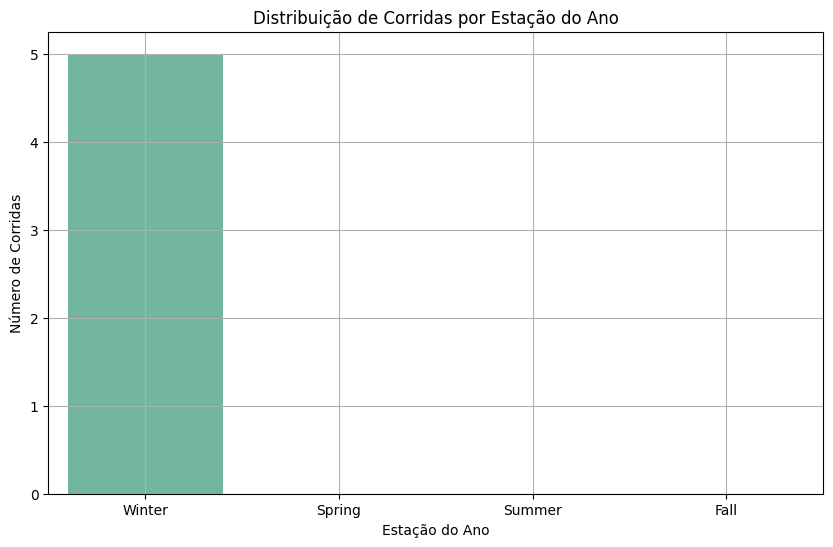

In [39]:
# Verificar se os meses estão sendo corretamente mapeados para as estações do ano
print(taxis['pickup_datetime'].dt.month.value_counts())  # Contagem de corridas por mês

# Redefinir a categorização das estações do ano
taxis['trip_season'] = pd.cut(
    taxis['pickup_datetime'].dt.month,
    bins=[0, 3, 6, 9, 12],  # Bins para agrupar por estações: Primavera, Verão, Outono e Inverno
    labels=['Winter', 'Spring', 'Summer', 'Fall'],
    right=False  # Inclui o início do intervalo
)

# Verificar se as estações foram corretamente categorizadas
print(taxis['trip_season'].value_counts())

# Visualizar a distribuição das corridas por estação do ano
plt.figure(figsize=(10, 6))
sns.countplot(data=taxis, x='trip_season', palette='Set2')
plt.title('Distribuição de Corridas por Estação do Ano')
plt.xlabel('Estação do Ano')
plt.ylabel('Número de Corridas')
plt.grid(True)
plt.show()

Distribuição de viagens por período do dia:
time_of_day
morning      4
afternoon    1
night        0
evening      0
Name: count, dtype: int64

Verificar as primeiras linhas de 'pickup_hour' e 'time_of_day':
   pickup_hour time_of_day
0           10     morning
1           10     morning
2           11     morning
3           11     morning
4           12   afternoon


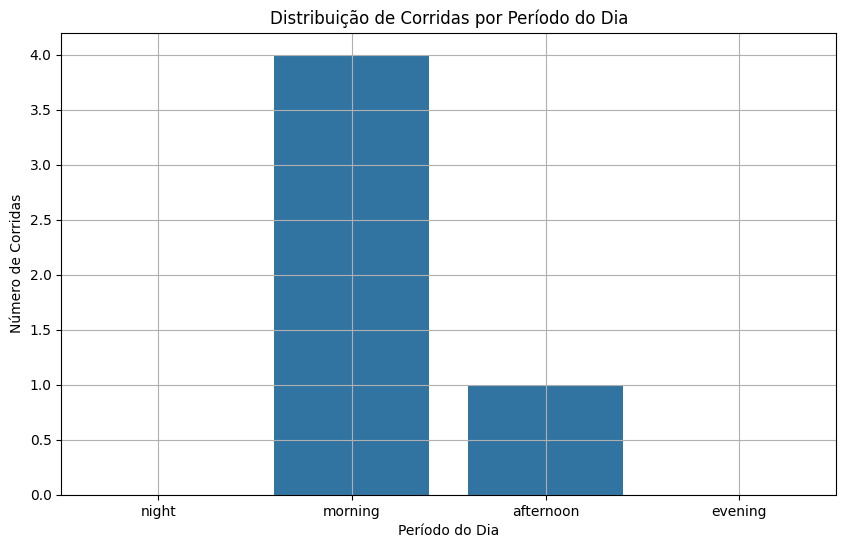

In [30]:
# Verificar a distribuição de viagens por período do dia
print("Distribuição de viagens por período do dia:")
print(taxis['time_of_day'].value_counts())

# Verificar se os horários estão corretamente categorizados
print("\nVerificar as primeiras linhas de 'pickup_hour' e 'time_of_day':")
print(taxis[['pickup_hour', 'time_of_day']].head())

# Visualização simples de contagem de viagens por período do dia
plt.figure(figsize=(10, 6))
sns.countplot(data=taxis, x='time_of_day', order=['night', 'morning', 'afternoon', 'evening'])
plt.title('Distribuição de Corridas por Período do Dia')
plt.xlabel('Período do Dia')
plt.ylabel('Número de Corridas')
plt.grid(True)
plt.show()

In [21]:
# Exibir um resumo estatístico das novas variáveis criadas
print("\nResumo Estatístico das Novas Variáveis Criadas:")
print(taxis[['price_per_mile', 'trip_duration', 'fare_per_minute', 'cost_per_passenger', 'trip_speed']].describe())


Resumo Estatístico das Novas Variáveis Criadas:
       price_per_mile  trip_duration  fare_per_minute  cost_per_passenger  \
count        5.000000         5.0000         5.000000             5.00000   
mean         8.333333        18.0000         1.850000            19.50000   
std          1.559024         8.3666         1.850676            17.71299   
min          6.666667        10.0000         0.500000             7.50000   
25%          7.500000        10.0000         0.750000            10.00000   
50%          7.500000        20.0000         1.000000            10.00000   
75%         10.000000        20.0000         2.000000            20.00000   
max         10.000000        30.0000         5.000000            50.00000   

       trip_speed  
count    5.000000  
mean    13.000000  
std     11.045361  
min      3.000000  
25%      6.000000  
50%      8.000000  
75%     18.000000  
max     30.000000  


In [22]:
# Nuevas fuentes de datos
import requests
import pandas as pd
import holidays

# Definir o país (neste exemplo, EUA)
us_holidays = holidays.US()

# Adicionar uma coluna que indica se a corrida ocorreu em um feriado
taxis['is_holiday'] = taxis['pickup_datetime'].apply(lambda x: 1 if x in us_holidays else 0)

# Exibir a tabela com a nova coluna de feriados
print(taxis[['pickup_datetime', 'is_holiday']])

      pickup_datetime  is_holiday
0 2024-01-01 10:00:00           1
1 2024-01-01 10:30:00           1
2 2024-01-01 11:00:00           1
3 2024-01-01 11:30:00           1
4 2024-01-01 12:00:00           1


In [23]:
# Verificar a contagem de corridas em dias normais e feriados
print(taxis['is_holiday'].value_counts())

# Verificar o número de corridas em feriados para garantir que a coluna foi gerada corretamente
print(taxis[taxis['is_holiday'] == 1].head())  # Exibir algumas linhas onde is_holiday é 1

is_holiday
1    5
Name: count, dtype: int64
   fare_amount  trip_distance     pickup_datetime  passenger_count  \
0           10            1.0 2024-01-01 10:00:00                1   
1           15            2.0 2024-01-01 10:30:00                2   
2           20            3.0 2024-01-01 11:00:00                1   
3           30            4.0 2024-01-01 11:30:00                3   
4           50            5.0 2024-01-01 12:00:00                1   

   price_per_mile  pickup_hour distance_category passenger_count_category  \
0       10.000000           10             short                      low   
1        7.500000           10             short                      low   
2        6.666667           11            medium                      low   
3        7.500000           11            medium                     high   
4       10.000000           12              long                      low   

     dropoff_datetime  trip_duration time_of_day  cost_per_passenger  \


Distribuição de viagens entre dias normais e feriados:
is_holiday
1    5
Name: count, dtype: int64


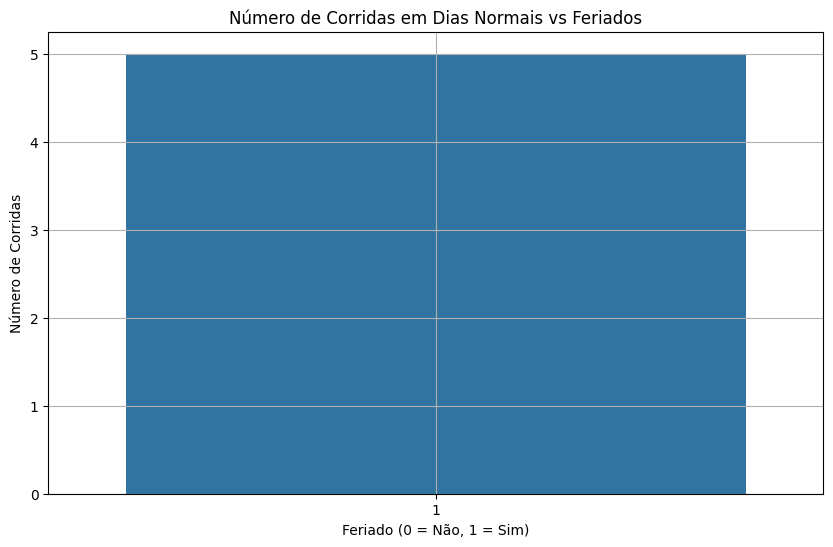

In [28]:
# Verificar a distribuição de viagens entre dias normais e feriados
print("Distribuição de viagens entre dias normais e feriados:")
print(taxis['is_holiday'].value_counts())

# Visualizar a contagem de viagens em feriados vs dias normais
plt.figure(figsize=(10, 6))
sns.countplot(data=taxis, x='is_holiday')
plt.title('Número de Corridas em Dias Normais vs Feriados')
plt.xlabel('Feriado (0 = Não, 1 = Sim)')
plt.ylabel('Número de Corridas')
plt.grid(True)
plt.show()

# Preguntas de Investigación
Esta sección pretende responder a las preguntas planteadas analizando y visualizando los resultados.

In [47]:
# Função para analisar o DataFrame
def analisar_dataframe(taxis):
    print("Informações do DataFrame:")
    print(taxis.info())
    print("\nDescrição estatística das variáveis:")
    print(taxis.describe())
    print("\nValores ausentes em cada coluna:")
    print(taxis.isnull().sum())

# Análise de locais de início e fim de viagem mais comuns
top_pickup_locations = taxis['PULocationID'].value_counts().head(10)
top_dropoff_locations = taxis['DOLocationID'].value_counts().head(10)

print("\nLocais mais comuns para início de viagem:")
print(top_pickup_locations)
print("\nLocais mais comuns para fim de viagem:")
print(top_dropoff_locations)


Locais mais comuns para início de viagem:
PULocationID
132    531555
237    483540
161    462042
236    427166
138    364281
162    350495
142    341835
230    329358
186    328582
170    299738
Name: count, dtype: int64

Locais mais comuns para fim de viagem:
DOLocationID
236    449704
237    431003
161    388114
230    307981
170    294666
142    286727
162    283166
239    282405
141    261196
163    250627
Name: count, dtype: int64


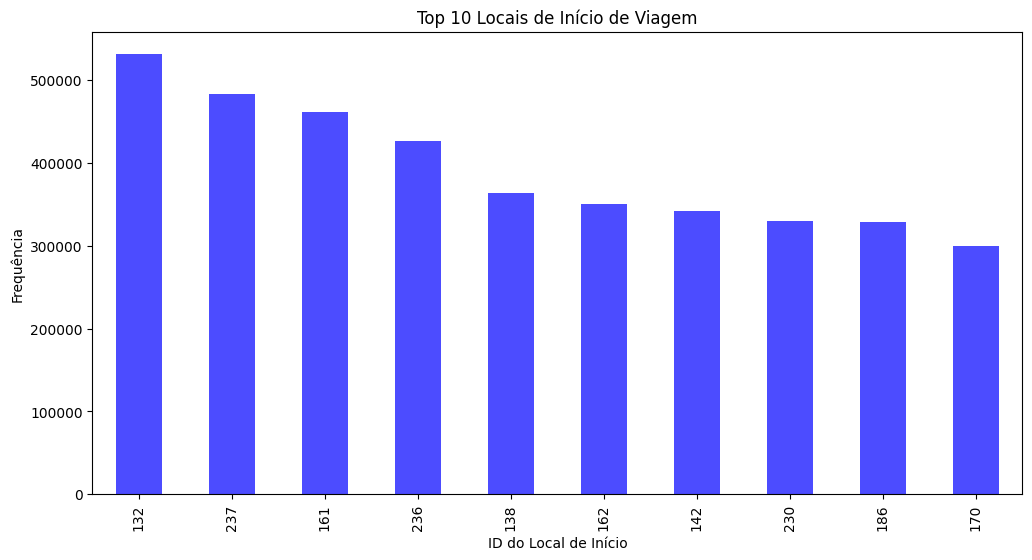

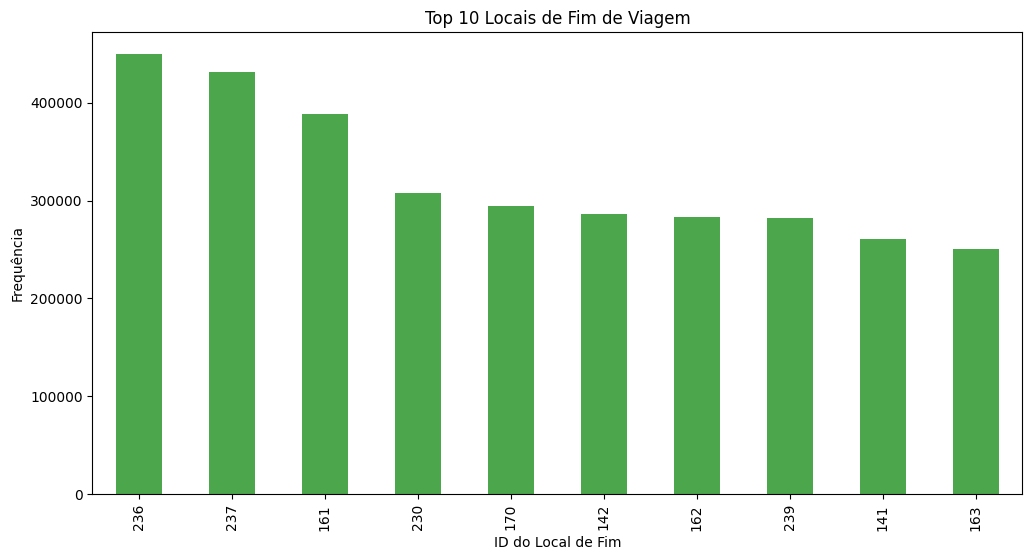

In [48]:
# Visualização dos locais mais comuns
plt.figure(figsize=(12, 6))
top_pickup_locations.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Top 10 Locais de Início de Viagem')
plt.xlabel('ID do Local de Início')
plt.ylabel('Frequência')
plt.show()

plt.figure(figsize=(12, 6))
top_dropoff_locations.plot(kind='bar', color='green', alpha=0.7)
plt.title('Top 10 Locais de Fim de Viagem')
plt.xlabel('ID do Local de Fim')
plt.ylabel('Frequência')
plt.show()

In [49]:
# Analisar a correlação entre locais de início e fim de viagem
local_corr = pd.crosstab(taxis['PULocationID'], taxis['DOLocationID'])
print("\nCorrelação entre locais de início e fim de viagem:")
print(local_corr.head(10))  # Exibir as 10 principais correlações


Correlação entre locais de início e fim de viagem:
DOLocationID   1    2    3    4    5    6     7    8    9    10   ...  256  \
PULocationID                                                      ...        
1             1226    0    0    0    0    2     0    0    0    0  ...    0   
2                0    0    0    0    0    0     0    0    0    0  ...    0   
3                0    0   11    1    1    0     1    0    0    1  ...    0   
4               45    0    1  337    0    0    26    0    0    0  ...  107   
5                1    0    0    0    4    0     0    0    0    0  ...    0   
6                2    0    0    0    0  127     0    0    0    0  ...    0   
7                2    0    1    5    0    0  1122    7    4    4  ...   10   
8                0    0    0    0    0    0     3    3    0    0  ...    0   
9                0    0    0    0    0    0     0    0   15    2  ...    0   
10               6    0    1    7    0    0     9    1    2  302  ...    8   

DOLocationI

In [53]:
# Análise de viagens em distância e tempo
print("\nEstatísticas de distância e tempo das viagens:")
print("Distância média:", taxis['trip_distance'].mean(),
      " | Mediana:", taxis['trip_distance'].median(),
      " | Desvio Padrão:", taxis['trip_distance'].std())
print("Duração média:", taxis['trip_duration'].mean(),
      " | Mediana:", taxis['trip_duration'].median(),
      " | Desvio Padrão:", taxis['trip_duration'].std())


Estatísticas de distância e tempo das viagens:
Distância média: 4.2721305239529475  | Mediana: 1.82  | Desvio Padrão: 261.0343429067649
Duração média: 17.68350981071604  | Mediana: 12.716666666666667  | Desvio Padrão: 42.065728514376616


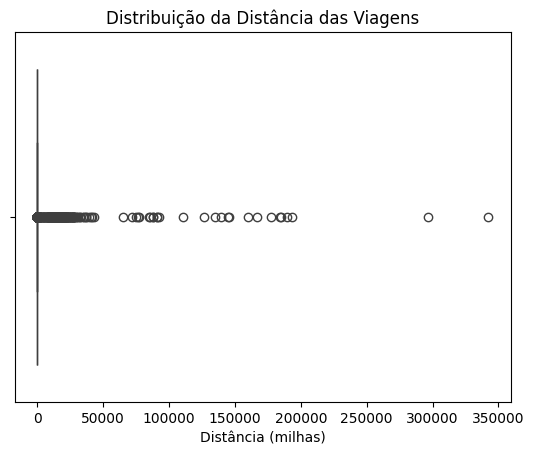

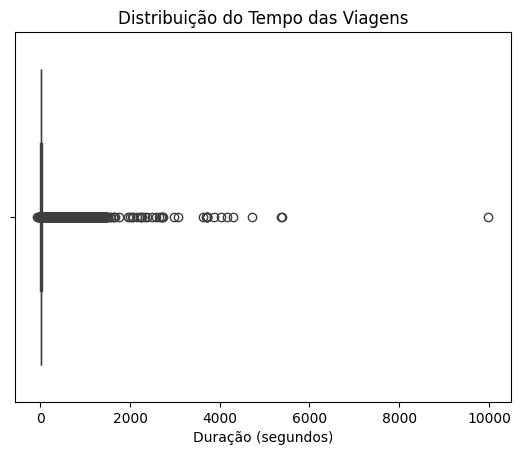

In [54]:
# Visualização
sns.boxplot(x='trip_distance', data=taxis)
plt.title('Distribuição da Distância das Viagens')
plt.xlabel('Distância (milhas)')
plt.show()

sns.boxplot(x='trip_duration', data=taxis)
plt.title('Distribuição do Tempo das Viagens')
plt.xlabel('Duração (segundos)')
plt.show()

In [7]:
# Convert the 'tpep_pickup_datetime' column to datetime objects
taxis['pickup_datetime'] = pd.to_datetime(taxis['tpep_pickup_datetime'])

# Análise por dia da semana
taxis['day_of_week'] = taxis['pickup_datetime'].dt.day_name()

# Distância e tempo por dia da semana
dist_por_dia = taxis.groupby('day_of_week')['trip_distance'].mean()
duracao_por_dia = taxis.groupby('day_of_week')['trip_duration'].mean()

print("\nDistância média por dia da semana:")
print(dist_por_dia)
print("\nDuração média por dia da semana:")
print(duracao_por_dia)


Distância média por dia da semana:
day_of_week
Friday       4.265065
Monday       4.726538
Saturday     3.840263
Sunday       4.618845
Thursday     4.604836
Tuesday      3.956515
Wednesday    3.992946
Name: trip_distance, dtype: float64

Duração média por dia da semana:
day_of_week
Friday       17.748444
Monday       17.319165
Saturday     16.698373
Sunday       17.039222
Thursday     18.662424
Tuesday      17.906651
Wednesday    18.163104
Name: trip_duration, dtype: float64


In [8]:
# Variância por dia da semana
variancia_dist_por_dia = taxis.groupby('day_of_week')['trip_distance'].var()
variancia_duracao_por_dia = taxis.groupby('day_of_week')['trip_duration'].var()

print("\nVariância da distância por dia da semana:")
print(variancia_dist_por_dia)
print("\nVariância da duração por dia da semana:")
print(variancia_duracao_por_dia)


Variância da distância por dia da semana:
day_of_week
Friday        49163.182245
Monday        60381.250096
Saturday      45550.616747
Sunday        76405.135667
Thursday     158310.521507
Tuesday       47699.877706
Wednesday     34621.042553
Name: trip_distance, dtype: float64

Variância da duração por dia da semana:
day_of_week
Friday       1905.000001
Monday       1623.879125
Saturday     2001.821998
Sunday       1871.241637
Thursday     1685.508476
Tuesday      1638.488202
Wednesday    1661.943084
Name: trip_duration, dtype: float64


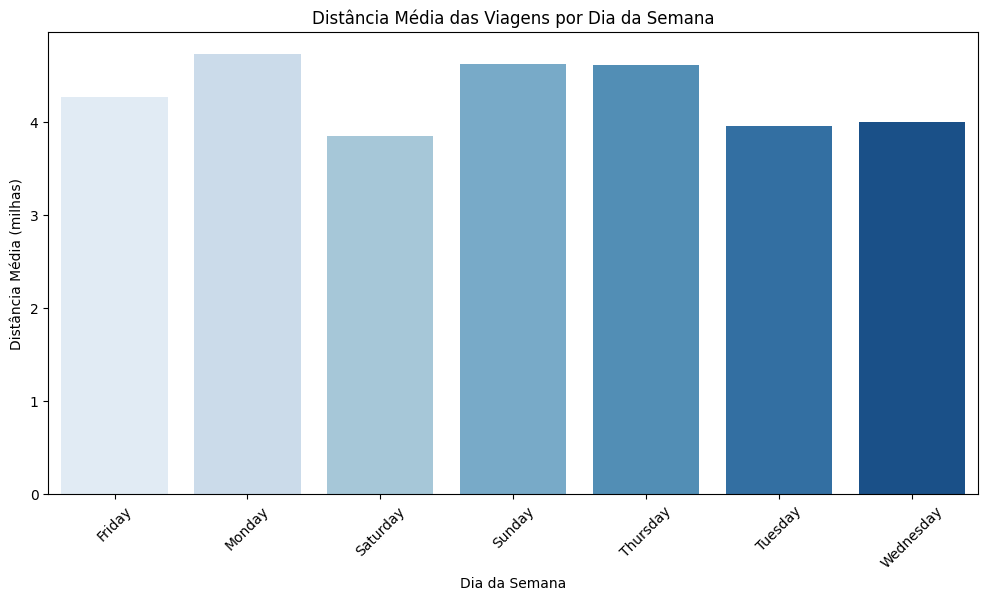

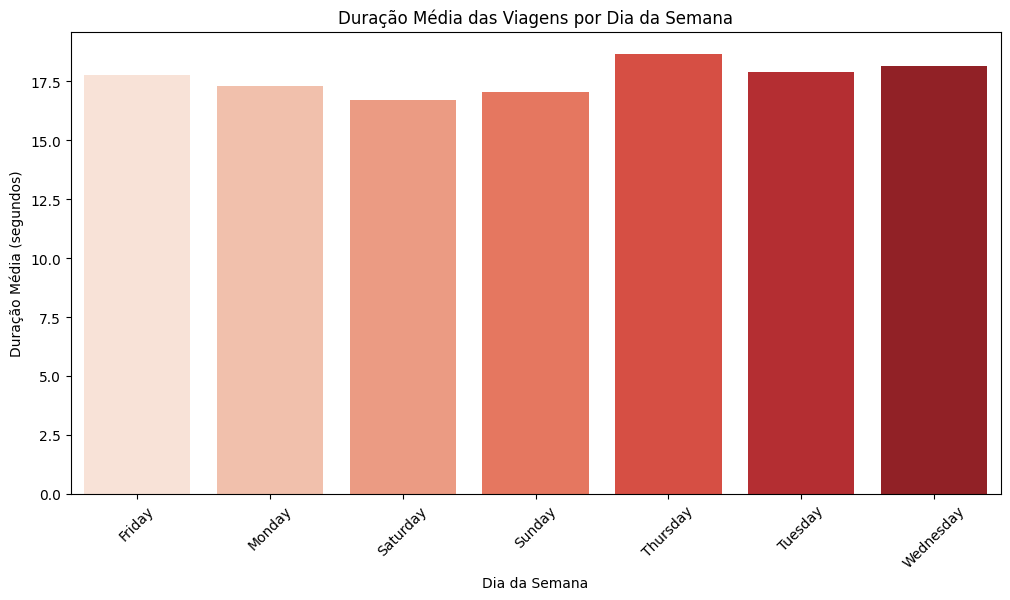

In [11]:
# Gráficos para distâncias e durações por dia da semana
plt.figure(figsize=(12, 6))
sns.barplot(x=dist_por_dia.index, y=dist_por_dia.values, palette='Blues')
plt.title('Distância Média das Viagens por Dia da Semana')
plt.ylabel('Distância Média (milhas)')
plt.xlabel('Dia da Semana')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=duracao_por_dia.index, y=duracao_por_dia.values, palette='Reds')
plt.title('Duração Média das Viagens por Dia da Semana')
plt.ylabel('Duração Média (segundos)')
plt.xlabel('Dia da Semana')
plt.xticks(rotation=45)
plt.show()

In [9]:
# Análise segundo o horário do dia
taxis['pickup_hour'] = taxis['pickup_datetime'].dt.hour
dist_por_hora = taxis.groupby('pickup_hour')['trip_distance'].mean()
duracao_por_hora = taxis.groupby('pickup_hour')['trip_duration'].mean()

print("\nDistância média por hora do dia:")
print(dist_por_hora)
print("\nDuração média por hora do dia:")
print(duracao_por_hora)


Distância média por hora do dia:
pickup_hour
0      4.160426
1      4.064989
2      4.208115
3      3.628405
4     13.479801
5     12.943792
6      8.471879
7      6.880187
8      4.550026
9      4.879119
10     3.492359
11     3.531043
12     3.813474
13     3.943263
14     4.077246
15     4.350801
16     3.956413
17     4.182077
18     4.082236
19     3.832817
20     3.598738
21     3.720677
22     4.259366
23     4.497279
Name: trip_distance, dtype: float64

Duração média por hora do dia:
pickup_hour
0     15.925842
1     14.887939
2     13.718154
3     14.271841
4     15.427023
5     16.085914
6     15.879835
7     15.882430
8     16.610254
9     16.622641
10    17.325393
11    18.198519
12    18.837328
13    19.594681
14    20.652950
15    21.149860
16    21.277509
17    19.261223
18    16.991503
19    15.836583
20    15.481340
21    15.465601
22    16.243008
23    16.646360
Name: trip_duration, dtype: float64


In [10]:
# Variância por hora do dia
variancia_dist_por_hora = taxis.groupby('pickup_hour')['trip_distance'].var()
variancia_duracao_por_hora = taxis.groupby('pickup_hour')['trip_duration'].var()

print("\nVariância da distância por hora do dia:")
print(variancia_dist_por_hora)
print("\nVariância da duração por hora do dia:")
print(variancia_duracao_por_hora)


Variância da distância por hora do dia:
pickup_hour
0       1416.056072
1       7284.508223
2      26365.173977
3         16.201731
4     789768.886193
5     731584.081702
6     149675.540355
7     322093.663474
8     148283.643268
9     348253.478240
10      3879.697653
11      4884.858019
12     21467.772437
13     30688.502634
14     14677.597384
15      8269.566459
16      6406.254073
17    110645.140537
18    168285.922650
19      7114.006870
20      1107.688083
21      1967.746325
22     53151.886563
23      4246.937891
Name: trip_distance, dtype: float64

Variância da duração por hora do dia:
pickup_hour
0     2423.188692
1     2684.599994
2     2277.951398
3     3173.452689
4     2137.724313
5     1152.929346
6     1026.161849
7     1259.588366
8     1369.514949
9     1274.758810
10    1579.918059
11    1660.165437
12    2028.351599
13    1916.451803
14    1862.566431
15    1952.106146
16    2262.906194
17    1769.831373
18    1622.125011
19    1685.787277
20    1488.654906
21

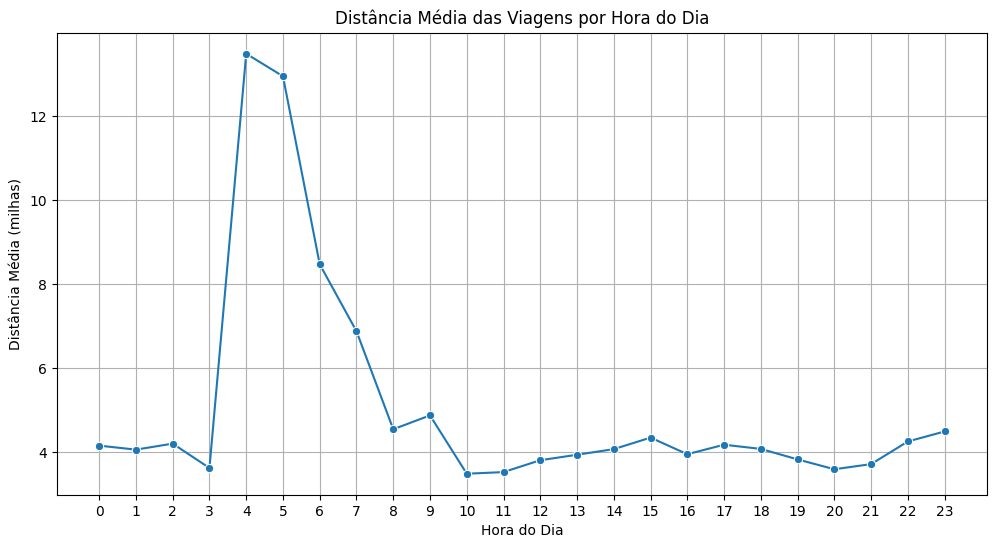

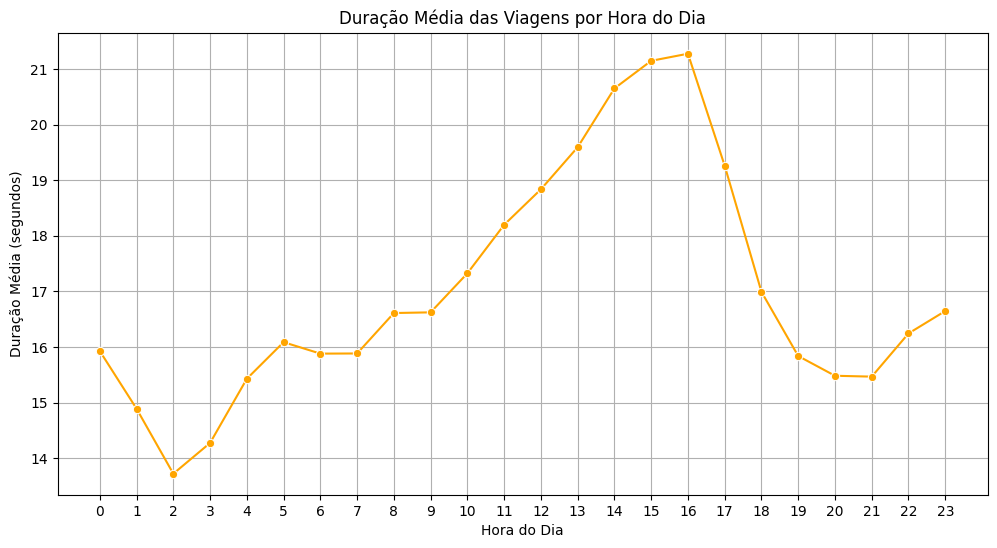

          VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0                1  2023-04-01 00:14:49   2023-04-01 00:45:01   
1                2  2023-04-01 00:00:24   2023-04-01 00:56:19   
2                1  2023-04-01 00:03:50   2023-04-01 00:14:42   
3                1  2023-04-01 00:53:18   2023-04-01 01:01:28   
4                2  2023-04-01 00:07:00   2023-04-01 00:17:16   
...            ...                  ...                   ...   
10109128         2  2023-06-30 23:30:21   2023-07-01 00:00:46   
10109129         1  2023-06-30 23:34:22   2023-07-01 00:32:59   
10109130         2  2023-06-30 23:45:00   2023-07-01 00:10:00   
10109131         2  2023-06-30 23:13:38   2023-06-30 23:51:19   
10109132         2  2023-06-30 23:18:00   2023-06-30 23:31:00   

          passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                     2.0           4.90         1.0                  N   
1                     1.0          21.89         2.0                 

In [12]:
# Visualização
plt.figure(figsize=(12, 6))
sns.lineplot(x=dist_por_hora.index, y=dist_por_hora.values, marker='o')
plt.title('Distância Média das Viagens por Hora do Dia')
plt.ylabel('Distância Média (milhas)')
plt.xlabel('Hora do Dia')
plt.xticks(range(24))
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x=duracao_por_hora.index, y=duracao_por_hora.values, marker='o', color='orange')
plt.title('Duração Média das Viagens por Hora do Dia')
plt.ylabel('Duração Média (segundos)')
plt.xlabel('Hora do Dia')
plt.xticks(range(24))
plt.grid()
plt.show()

# Exibir o DataFrame resultante
print(taxis)

# Visualización de datos
A lo largo del trabajo se han ido añadiendo visualizaciones para mostrar los resultados después de cada análisis, por lo que en esta sección sólo se han añadido algunos gráficos adicionales para visualizar otras relaciones relevantes entre variables.

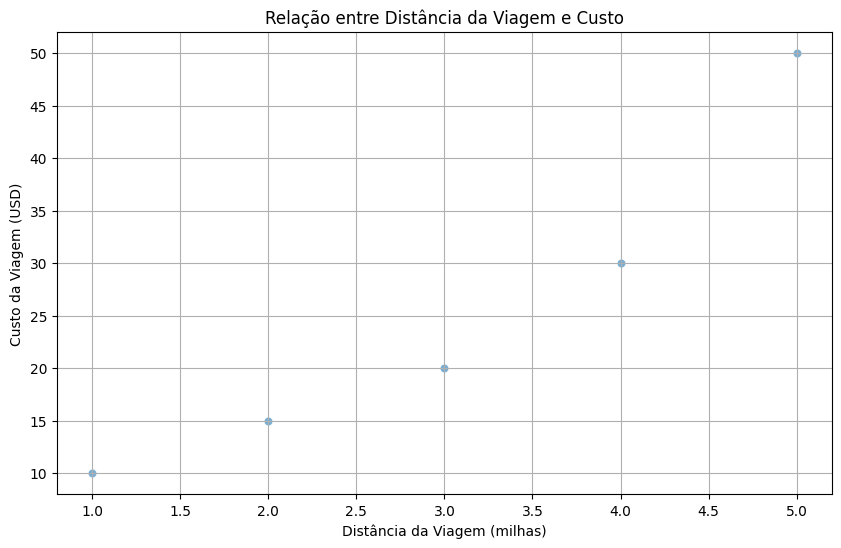

In [34]:
# Converter a coluna de data e hora
taxis['pickup_datetime'] = pd.to_datetime(taxis['pickup_datetime'])
taxis['day_of_week'] = taxis['pickup_datetime'].dt.day_name()
taxis['hour_of_day'] = taxis['pickup_datetime'].dt.hour

# Gráfico de Dispersão: Relação entre Distância e Custo
plt.figure(figsize=(10, 6))
sns.scatterplot(data=taxis, x='trip_distance', y='fare_amount', alpha=0.6)
plt.title('Relação entre Distância da Viagem e Custo')
plt.xlabel('Distância da Viagem (milhas)')
plt.ylabel('Custo da Viagem (USD)')
plt.grid()
plt.show()

In [41]:
print(taxis['pickup_datetime'].dt.date.value_counts())
taxis['day_of_week'] = taxis['pickup_datetime'].dt.day_name()
print(taxis['day_of_week'].value_counts())

pickup_datetime
2024-01-01    5
Name: count, dtype: int64
day_of_week
Monday    5
Name: count, dtype: int64


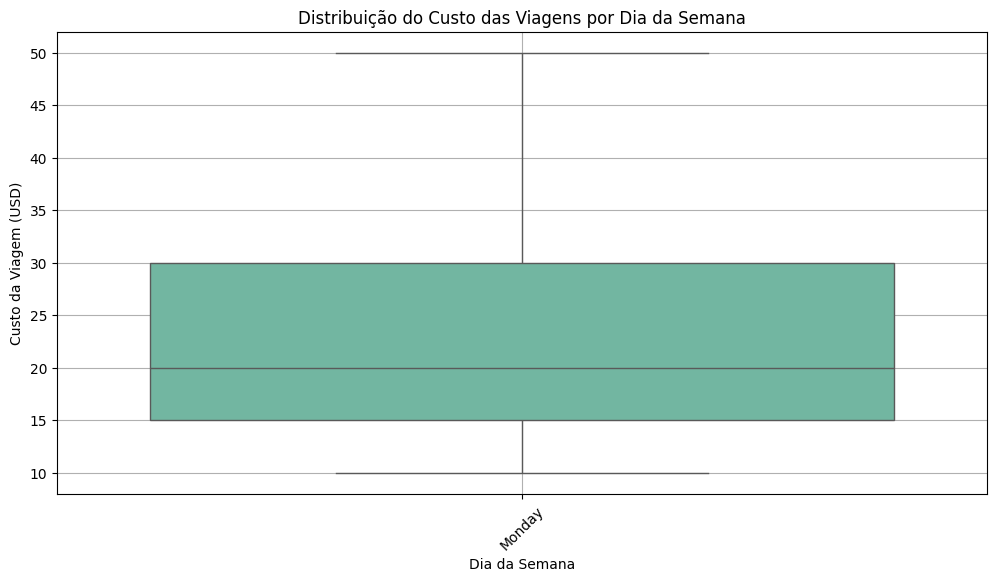

In [35]:
# 2. Boxplot: Distribuição do Custo das Viagens por Dia da Semana
plt.figure(figsize=(12, 6))
sns.boxplot(data=taxis, x='day_of_week', y='fare_amount', palette='Set2')
plt.title('Distribuição do Custo das Viagens por Dia da Semana')
plt.ylabel('Custo da Viagem (USD)')
plt.xlabel('Dia da Semana')
plt.xticks(rotation=45)
plt.grid()
plt.show()

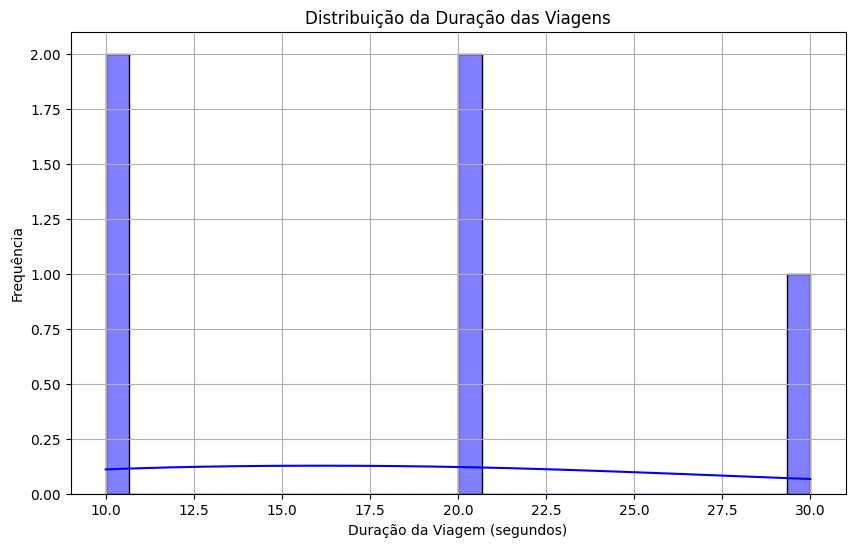

In [37]:
# 4. Histograma: Distribuição da Duração das Viagens
plt.figure(figsize=(10, 6))
sns.histplot(taxis['trip_duration'], bins=30, kde=True, color='blue')
plt.title('Distribuição da Duração das Viagens')
plt.xlabel('Duração da Viagem (segundos)')
plt.ylabel('Frequência')
plt.grid()
plt.show()

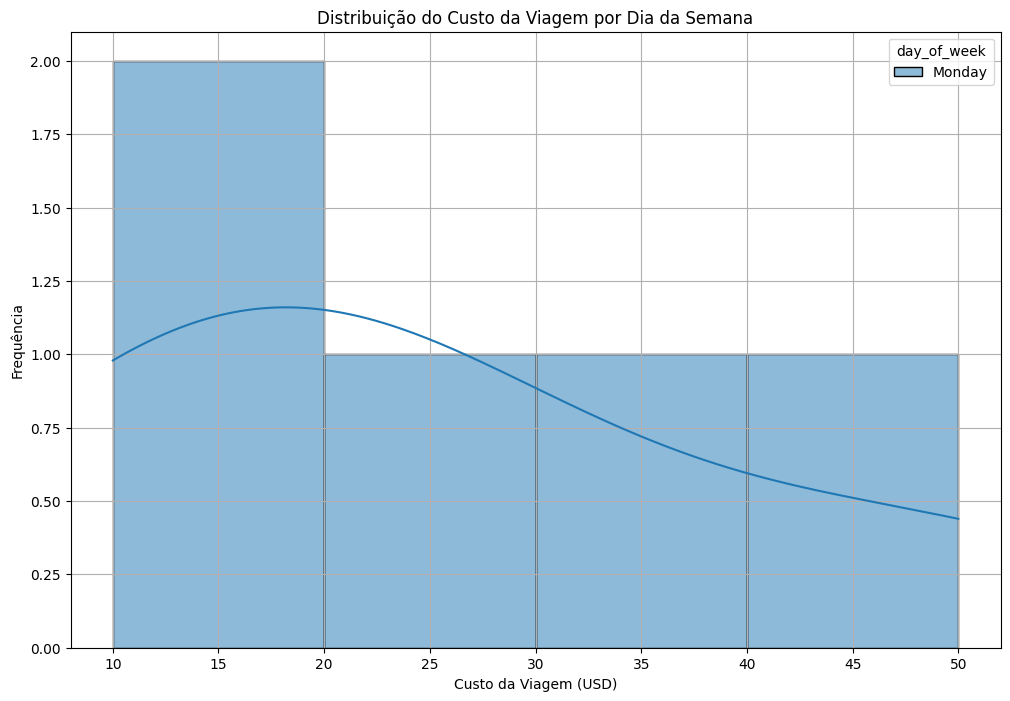

   fare_amount  trip_distance     pickup_datetime  passenger_count  \
0           10            1.0 2024-01-01 10:00:00                1   
1           15            2.0 2024-01-01 10:30:00                2   
2           20            3.0 2024-01-01 11:00:00                1   
3           30            4.0 2024-01-01 11:30:00                3   
4           50            5.0 2024-01-01 12:00:00                1   

   price_per_mile  pickup_hour distance_category passenger_count_category  \
0       10.000000           10             short                      low   
1        7.500000           10             short                      low   
2        6.666667           11            medium                      low   
3        7.500000           11            medium                     high   
4       10.000000           12              long                      low   

     dropoff_datetime  trip_duration  ... fare_per_minute  \
0 2024-01-01 10:20:00           20.0  ...            0.

In [38]:
# 5. Histogramas: Distribuição de 'fare_amount' por 'day_of_week'
plt.figure(figsize=(12, 8))
sns.histplot(data=taxis, x='fare_amount', hue='day_of_week', multiple="stack", kde=True)
plt.title('Distribuição do Custo da Viagem por Dia da Semana')
plt.xlabel('Custo da Viagem (USD)')
plt.ylabel('Frequência')
plt.grid()
plt.show()

# Exibir o DataFrame resultante para revisão
print(taxis)